In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

**Loading Dataset**

In [2]:
(X_train,y_train),(_,_) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

0


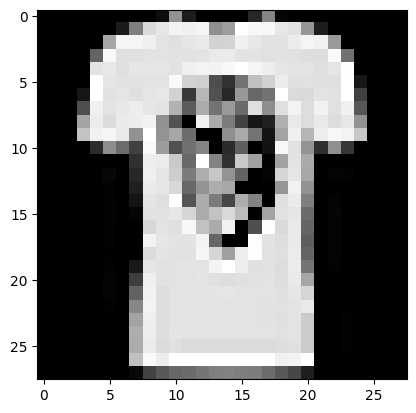

In [4]:
i = np.random.randint(0,60000)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [8]:
X_train = (X_train - 127.5) / 127.5

In [9]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [10]:
type(X_train)

numpy.ndarray

In [11]:
buffer_size = 60000
batch_size = 256

In [12]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

After tf.data.Dataset.from_tensor_slices(X_train):

The type changes to tf.data.Dataset.
This is a TensorFlow dataset object, which is an iterable over the elements of X_train. Each element in this dataset is a slice of the original X_train data.

In [13]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

**Building the generator**

In [14]:
7 * 7 * 128

6272

In [15]:
from tensorflow.keras import layers,utils


def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network


In [18]:
from tensorflow.keras import layers, models
import tensorflow as tf

def build_enhanced_generator():
    model = models.Sequential()

    # Dense and Reshape
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))

    # Conv2DTranspose Layers
    # 1st layer
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 2nd layer
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 3rd layer
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Output layer
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=True, activation='tanh'))

    return model


In [19]:
generator = build_enhanced_generator()

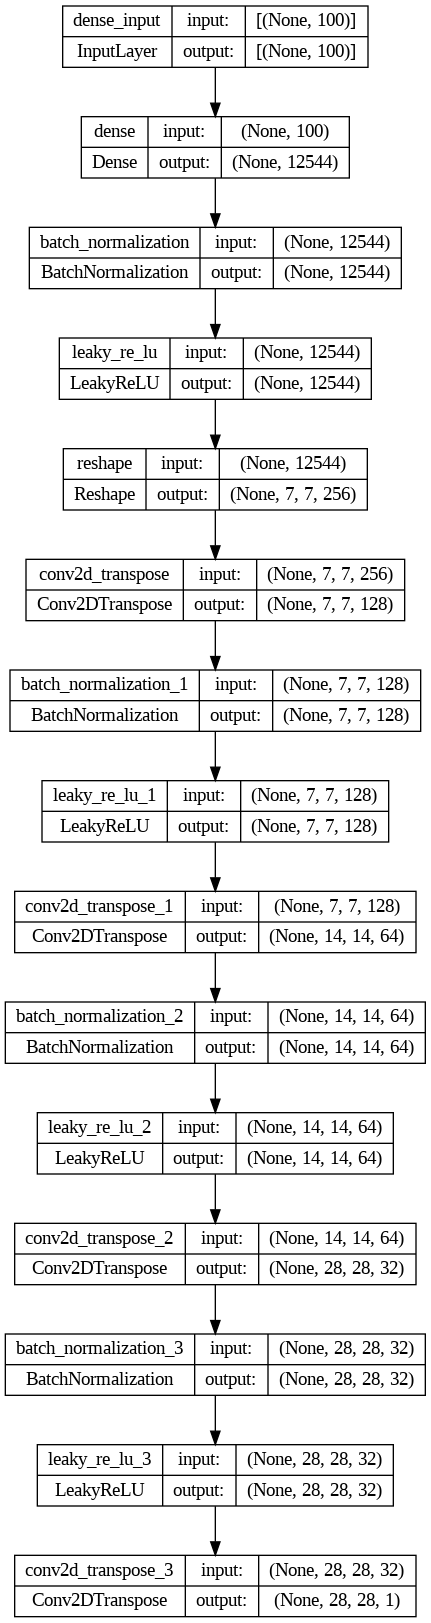

In [20]:
utils.plot_model(generator, to_file='generator_model.png', show_shapes=True, show_layer_names=True)


In [21]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.346572  , -1.0733491 , -0.173016  , -0.6509035 ,  0.5920062 ,
         0.092683  , -0.44090024,  0.322342  ,  0.6798411 ,  1.0079359 ,
        -0.49266282, -0.509958  , -1.128091  ,  0.41777378,  0.3125046 ,
         1.6752862 ,  0.21558976, -1.2839172 ,  1.2691416 ,  0.5495661 ,
        -0.37451503, -0.8179057 ,  2.1616464 , -1.4617612 ,  0.994824  ,
        -0.83706415, -0.664321  ,  0.8006678 , -1.9442836 ,  0.23792396,
        -1.7503756 , -0.8702892 ,  0.3435326 ,  0.7043273 , -0.9559537 ,
         1.5823184 , -1.1668627 ,  0.68359905, -0.3080863 ,  0.5650084 ,
         2.0344245 ,  0.9671985 ,  0.5550279 , -1.1272267 ,  0.95608324,
         1.9436837 , -0.51149684,  1.2672567 ,  0.5874724 , -1.3579413 ,
        -1.6703411 , -1.710347  , -0.66355824, -0.0571803 , -0.88029164,
         0.5233561 , -0.45351735,  0.2937996 , -0.245351  ,  0.97888005,
         0.39566377,  0.78213847,  0.05566753,  0.34490067, -1.1911594 ,
 

In [22]:
generated_image = generator(noise, training = False)

In [23]:
generated_image

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[ 2.06946558e-03],
         [ 5.94781525e-03],
         [-7.84452714e-04],
         [ 7.82523304e-03],
         [-2.26252852e-03],
         [ 1.03638209e-02],
         [-2.49445555e-03],
         [-5.42219821e-03],
         [-7.84879271e-03],
         [-1.26264486e-02],
         [ 2.93038529e-03],
         [ 5.05251484e-03],
         [-4.49719653e-03],
         [ 7.98824430e-03],
         [-5.32377651e-03],
         [-5.11729904e-03],
         [-1.69799179e-02],
         [ 2.25547701e-05],
         [ 9.62871406e-03],
         [ 8.27161316e-03],
         [-4.02836537e-04],
         [-6.63585542e-03],
         [ 9.18843318e-03],
         [ 3.25292768e-03],
         [-4.41783154e-03],
         [-1.31638278e-03],
         [ 7.78812275e-04],
         [-3.32283089e-03]],

        [[-2.53994437e-03],
         [ 6.73586922e-03],
         [ 4.73587075e-03],
         [ 3.33076529e-03],
         [ 1.99984317e-03],
         [-6.17062

In [24]:
generated_image.shape

TensorShape([1, 28, 28, 1])

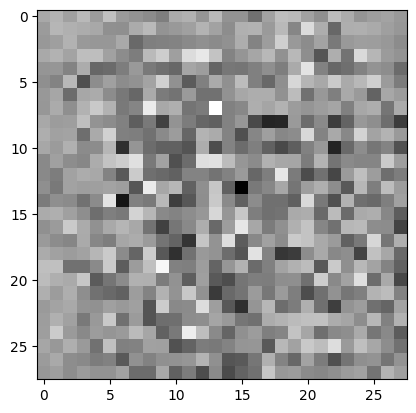

In [25]:
plt.imshow(generated_image[0, :,:,0], cmap='gray');

**Building the discriminator**

In [26]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = (5,5), padding = 'same', input_shape = [28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = (5,5), padding = 'same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network


In [27]:
def build_enhanced_discriminator():
    model = models.Sequential()

    # 1st Conv Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 2nd Conv Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 3rd Conv Layer
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Flatten and Dense for Output
    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [29]:
discriminator = build_enhanced_discriminator()

In [30]:
discriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [31]:
discriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00081513]], dtype=float32)>

In [27]:
tf.sigmoid(-0.00081761)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49979565>

**Error**

In [32]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [33]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [34]:
def discriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [35]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [36]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [37]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [38]:
batch_size, noise_dimension

(256, 100)

In [39]:
@tf.function
def train(images):
  noise = tf.random.normal([batch_size, noise_dimension])
  #print(noise.shape)
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    expected_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [40]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

In [41]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [42]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


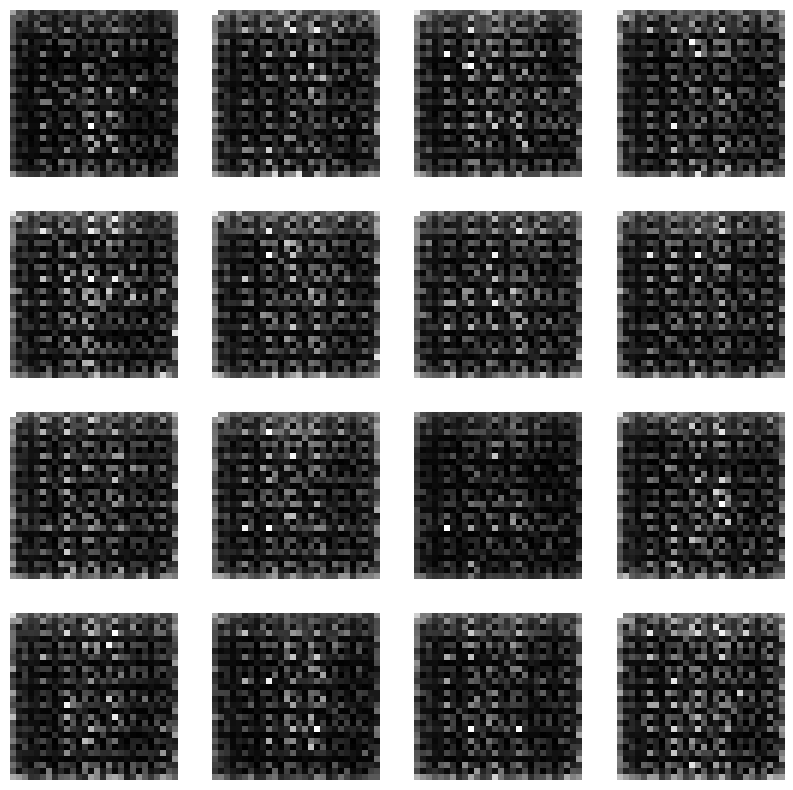

Epoch:  2


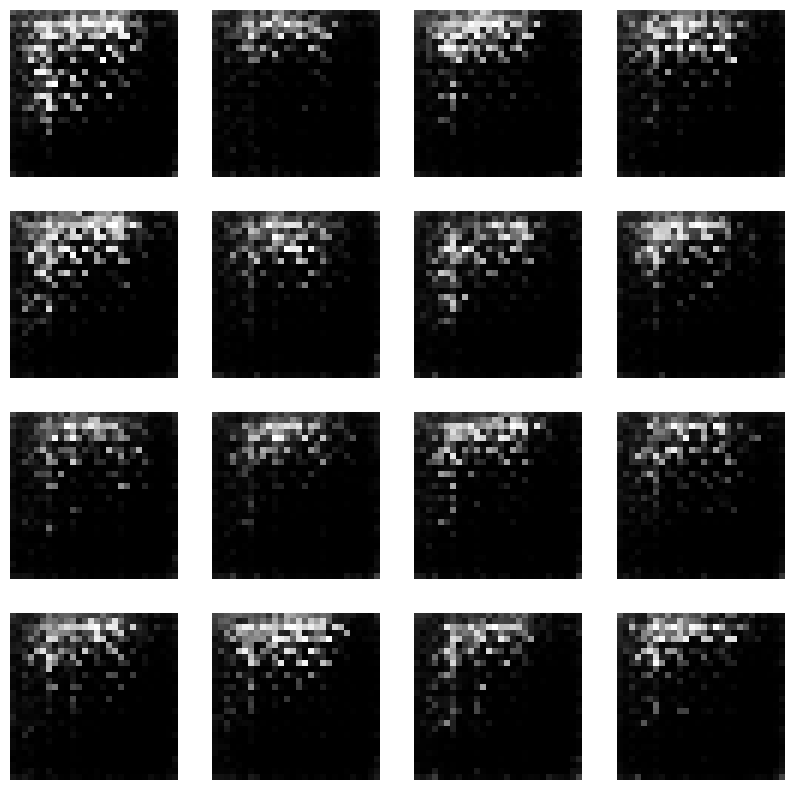

Epoch:  3


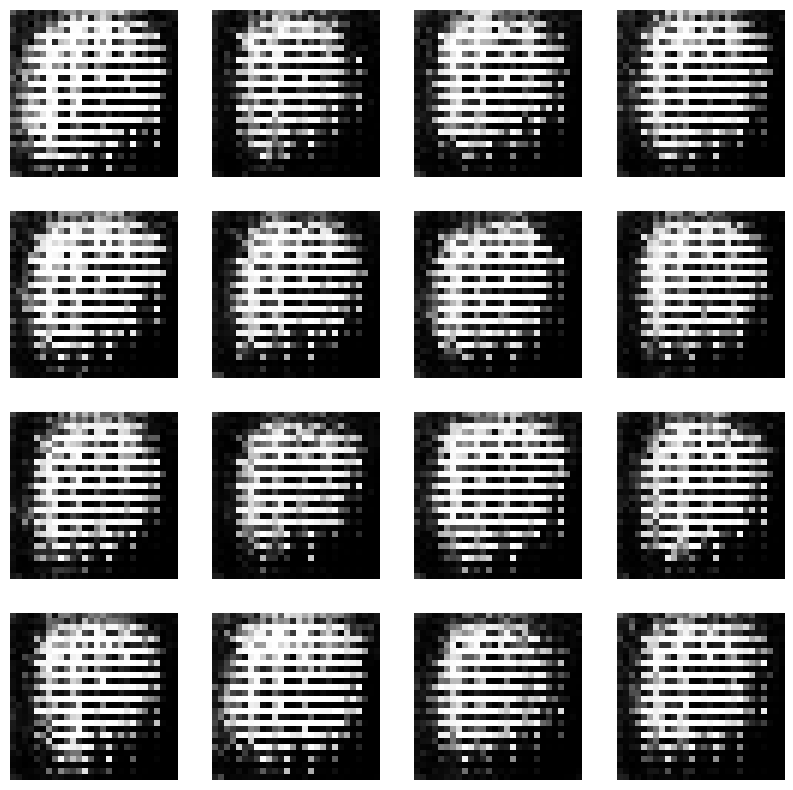

Epoch:  4


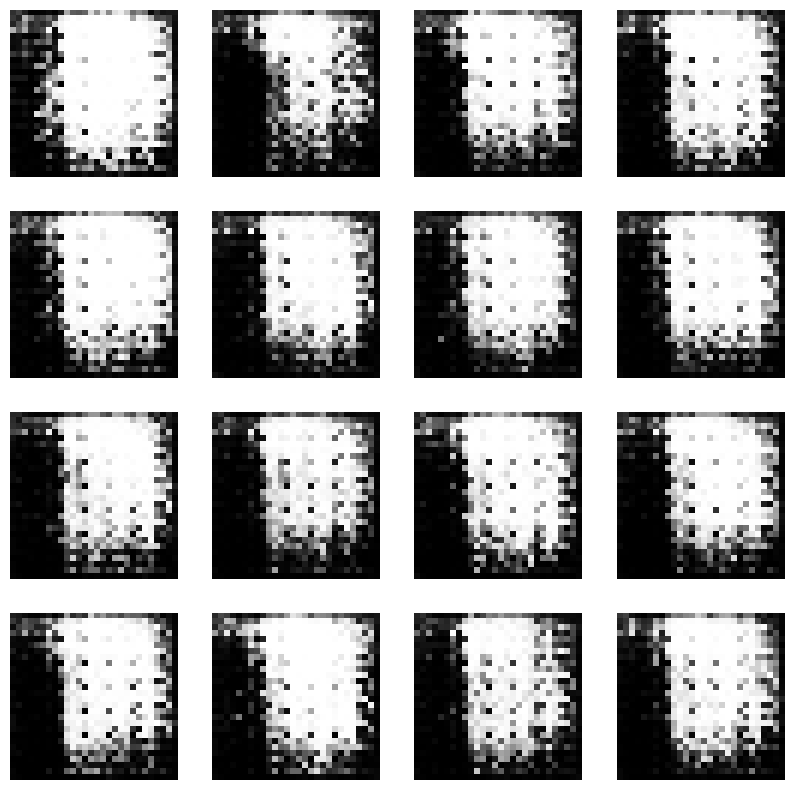

Epoch:  5


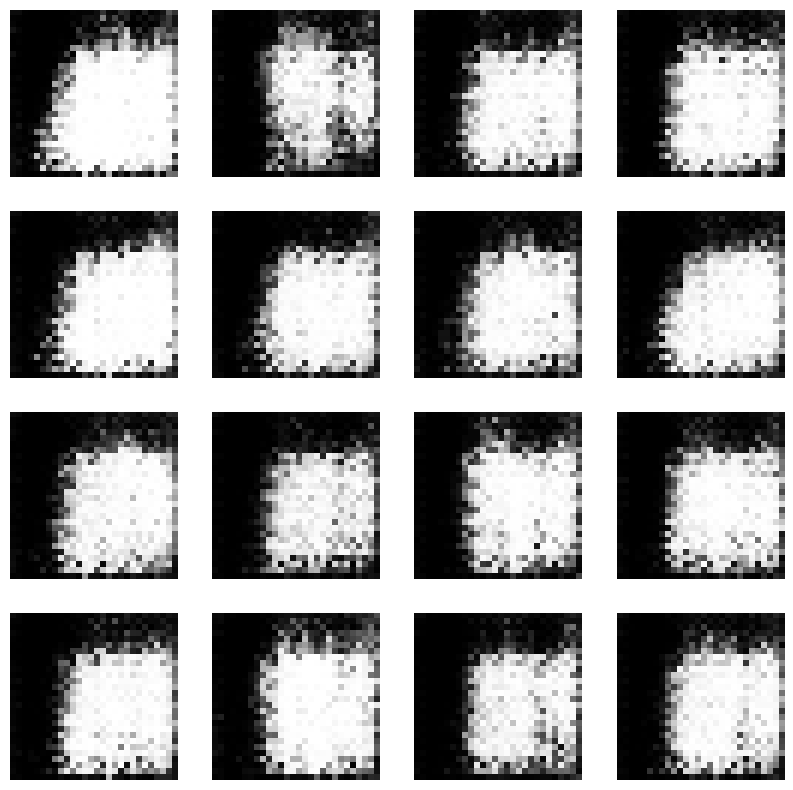

Epoch:  6


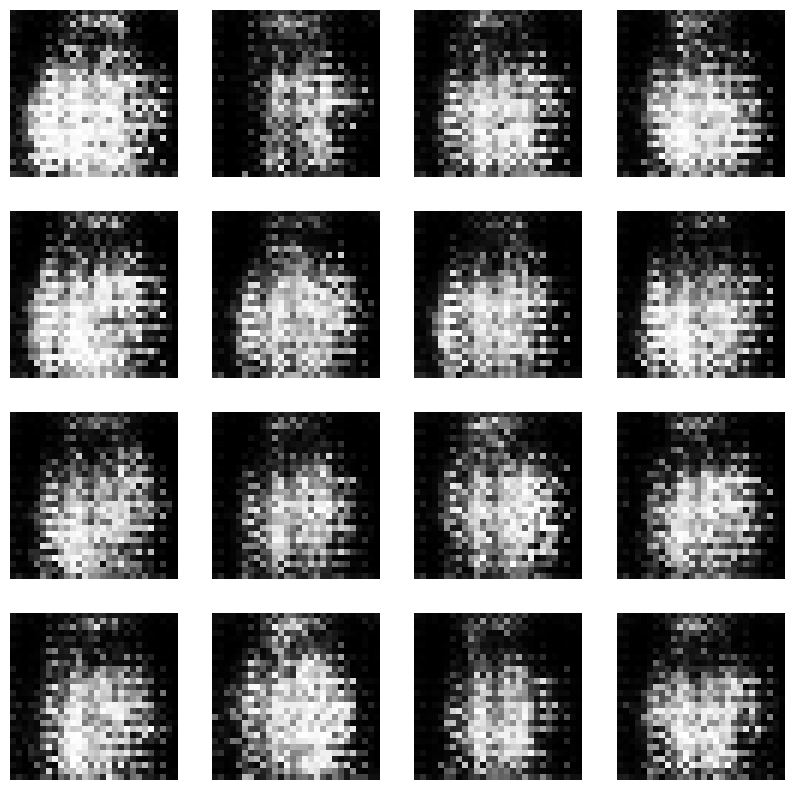

Epoch:  7


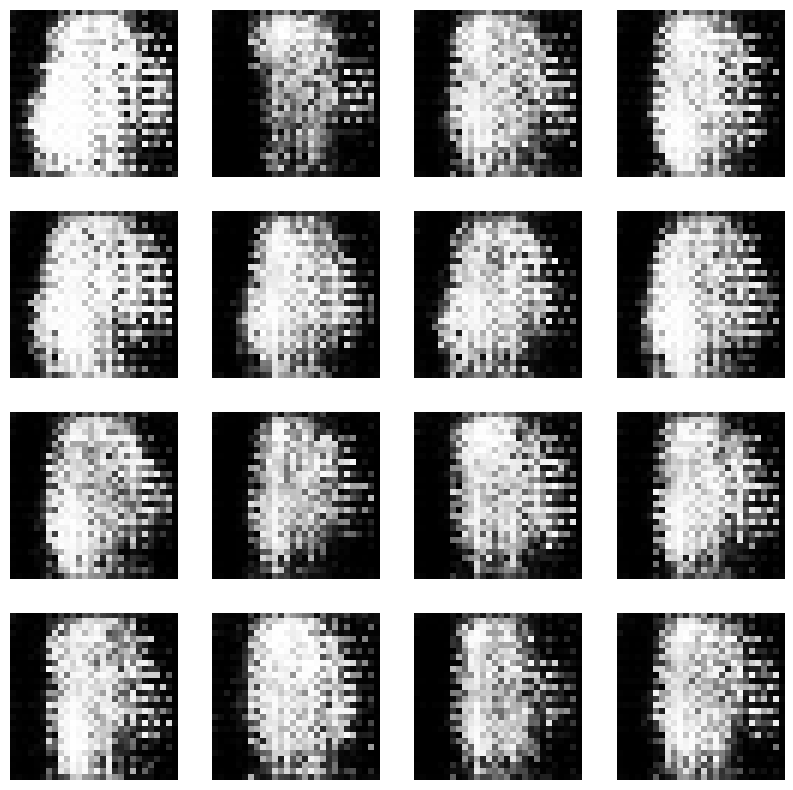

Epoch:  8


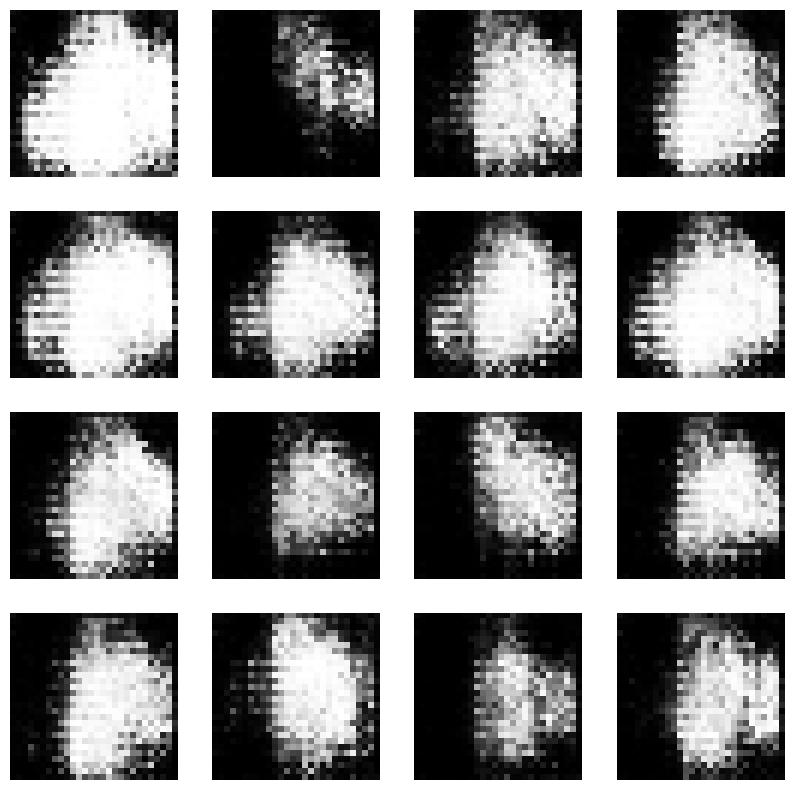

Epoch:  9


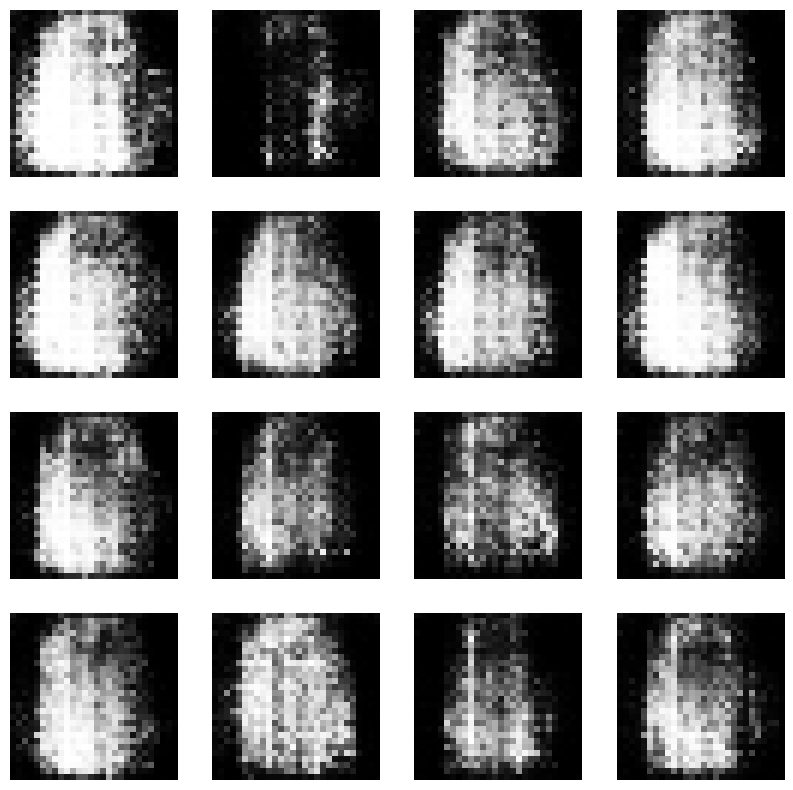

Epoch:  10


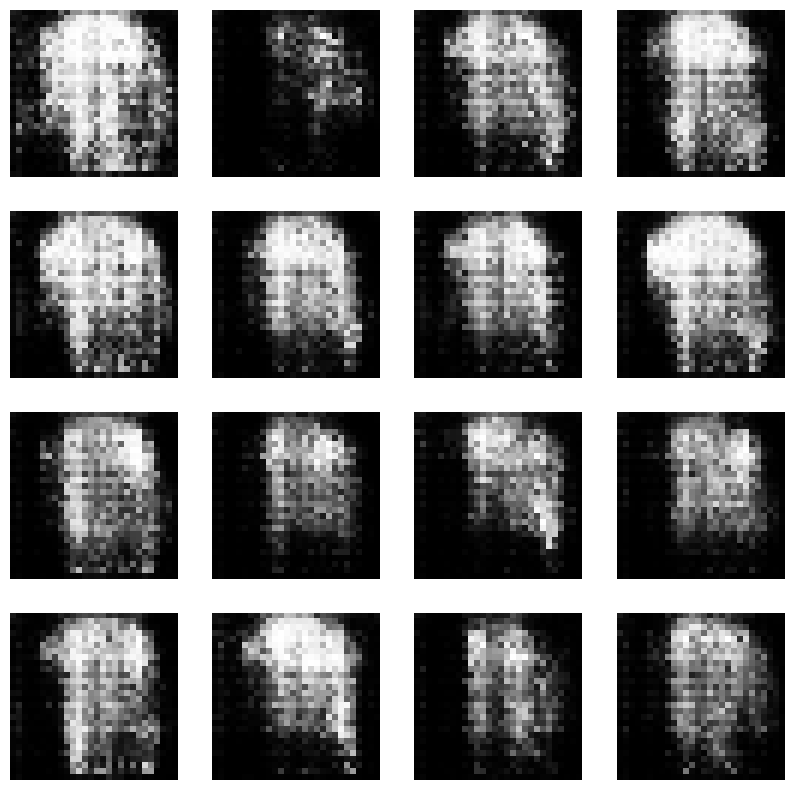

Epoch:  11


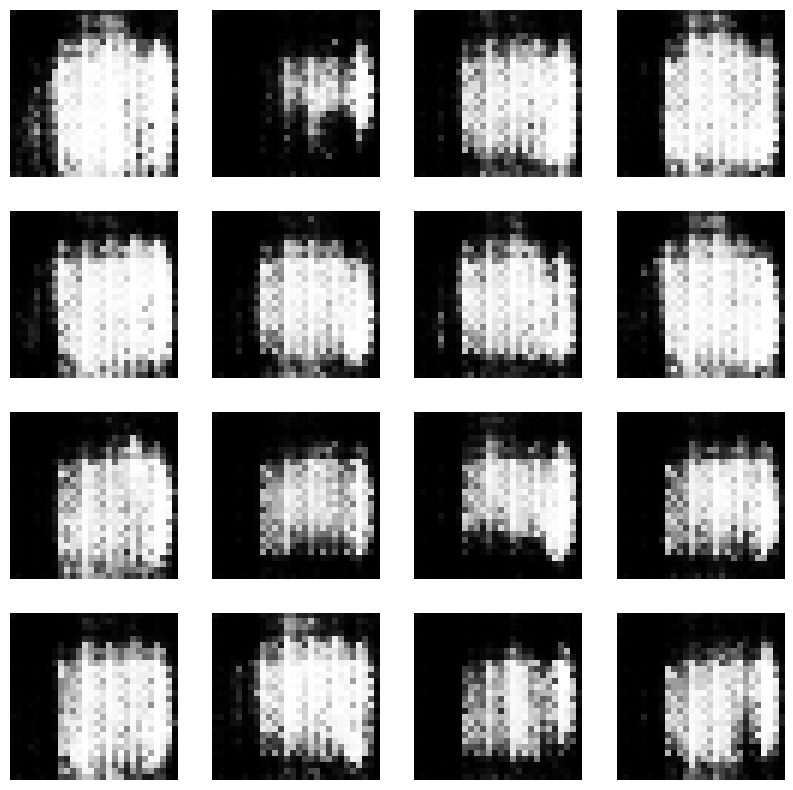

Epoch:  12


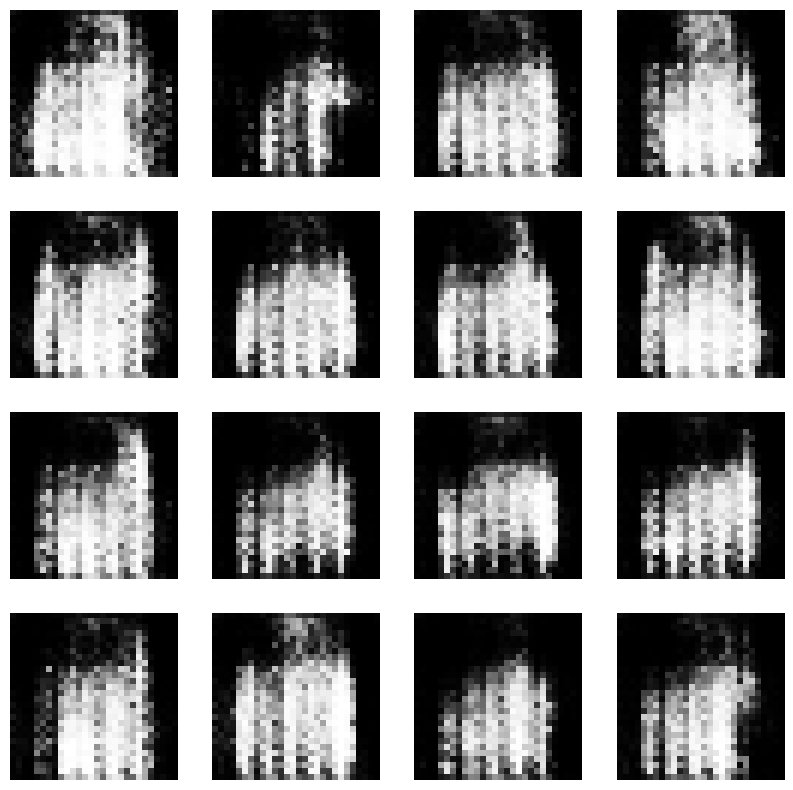

Epoch:  13


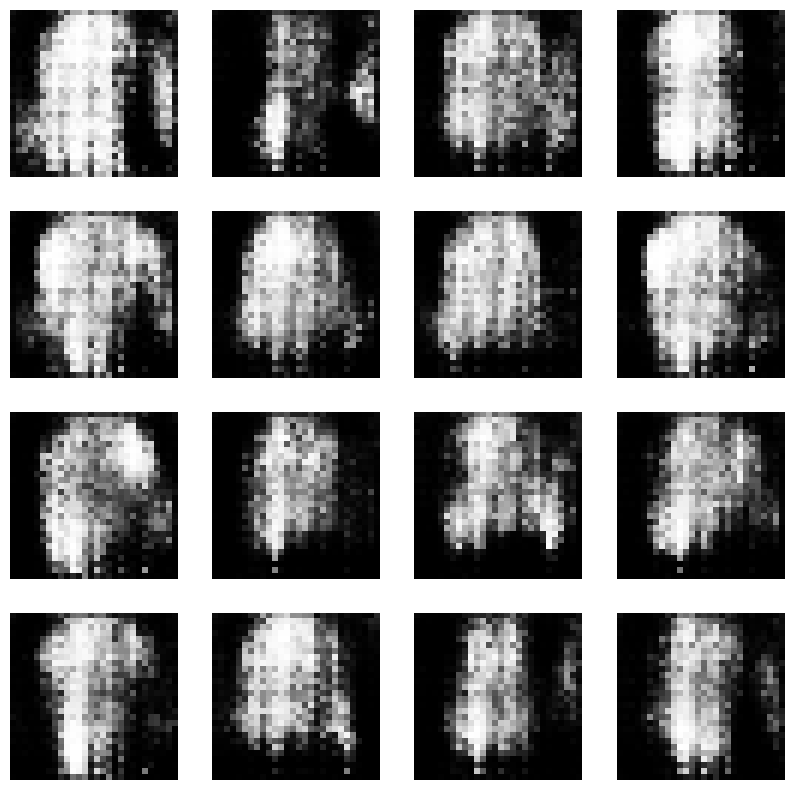

Epoch:  14


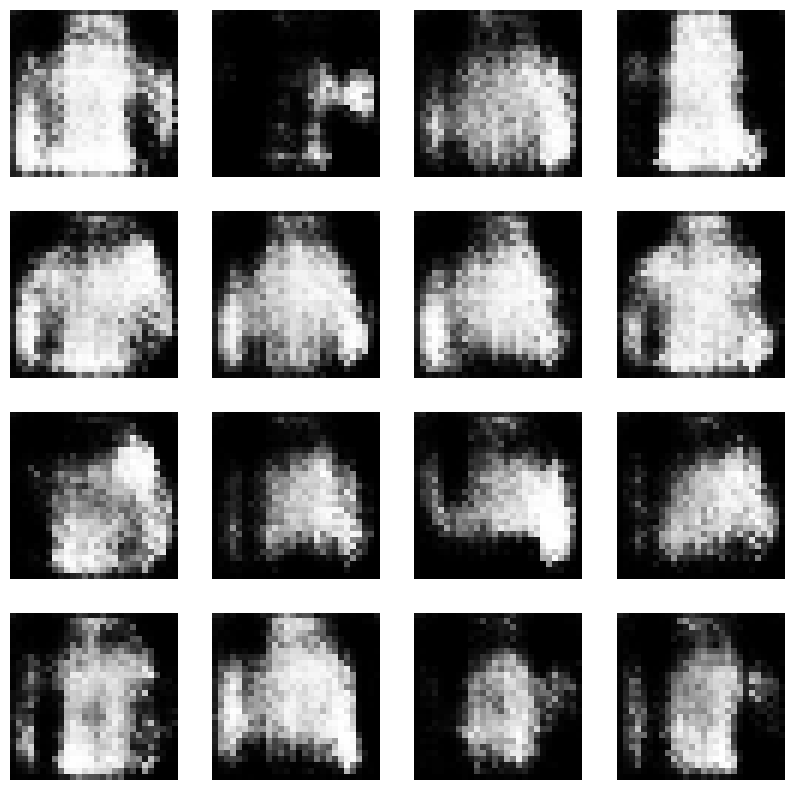

Epoch:  15


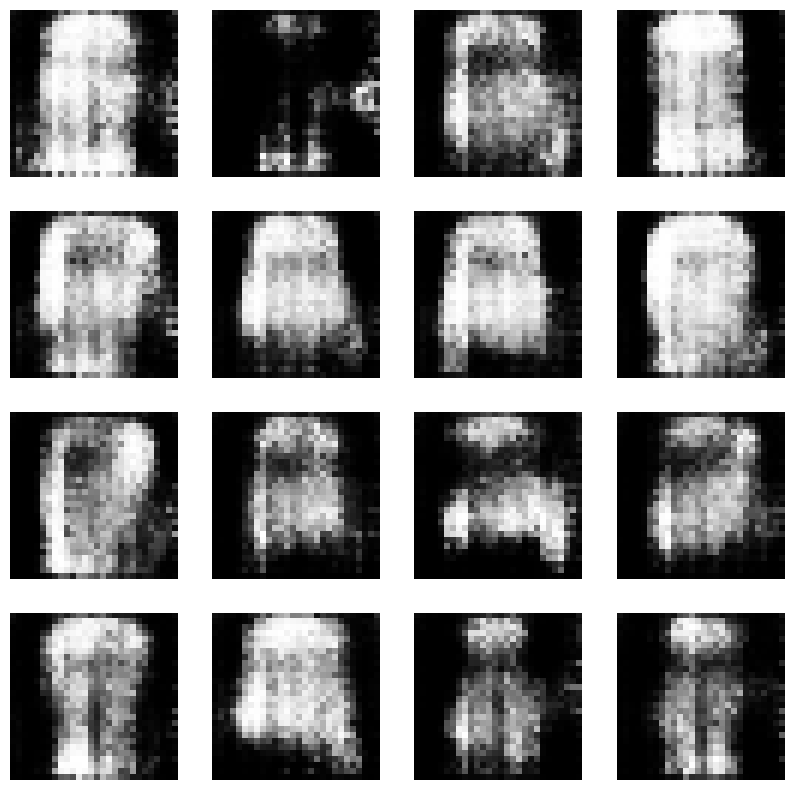

Epoch:  16


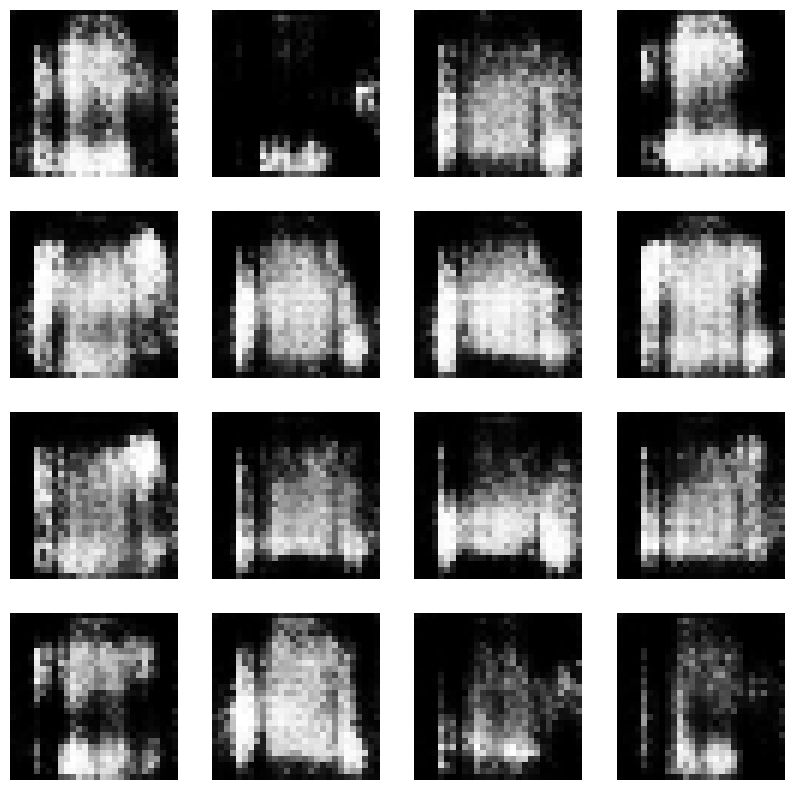

Epoch:  17


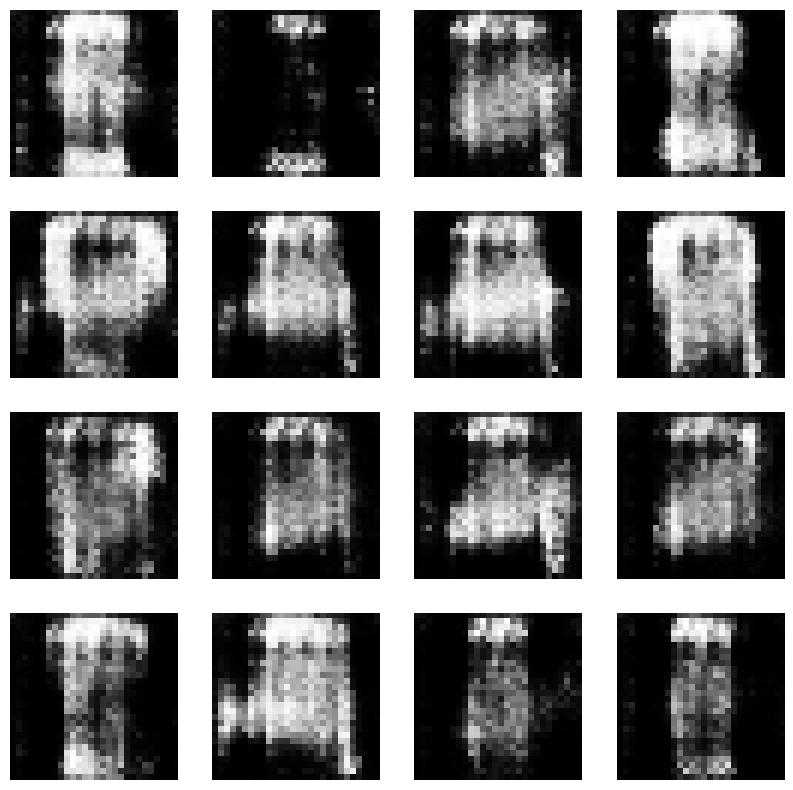

Epoch:  18


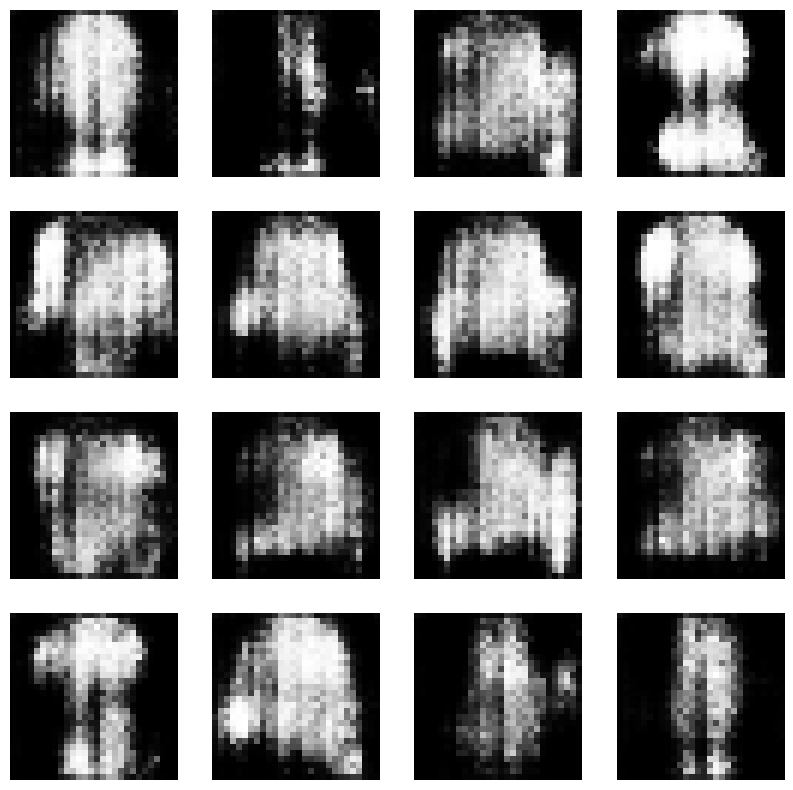

Epoch:  19


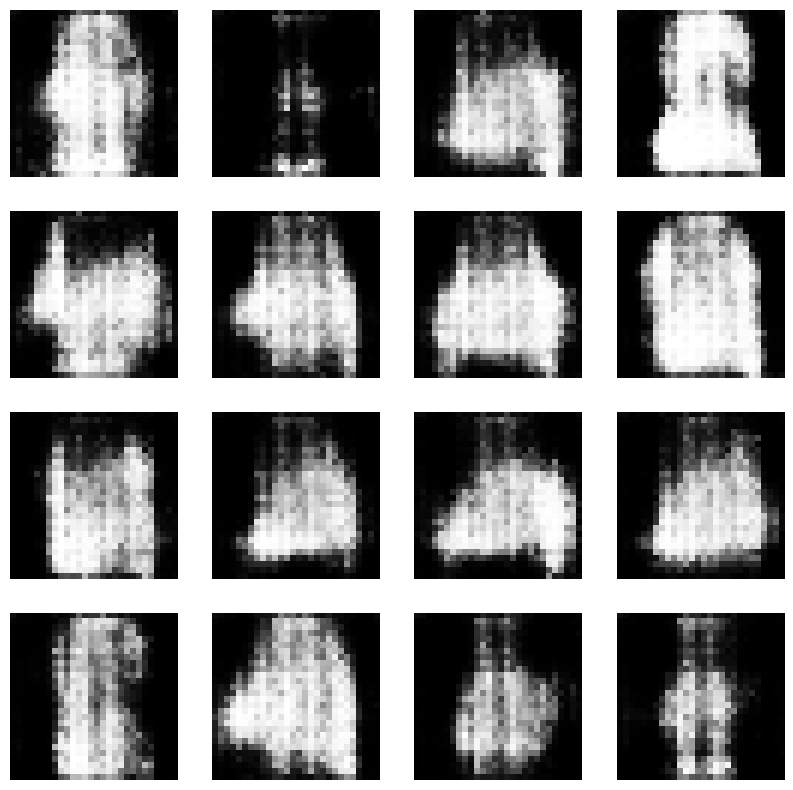

Epoch:  20


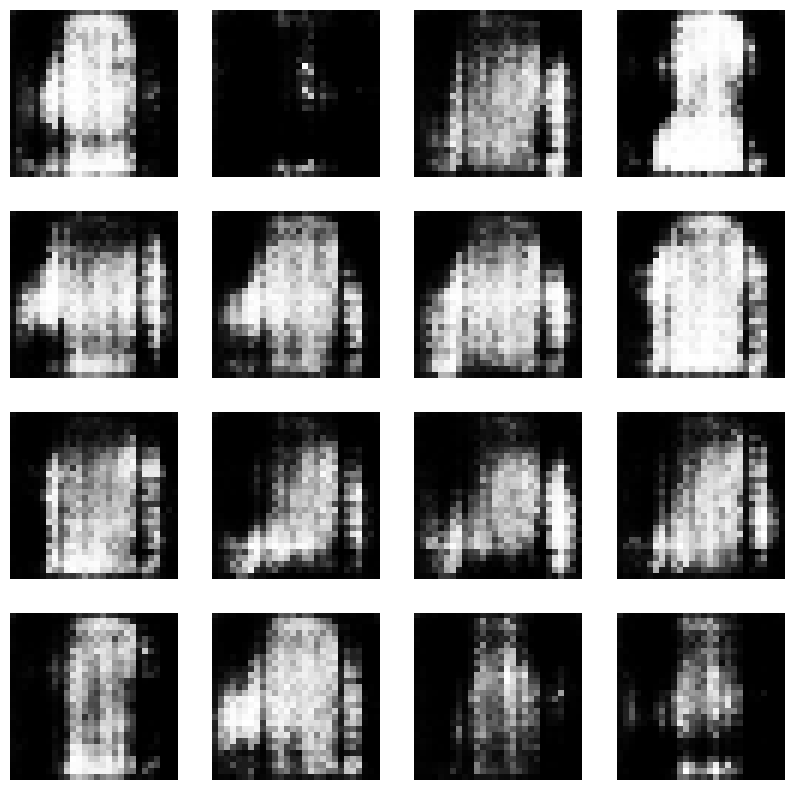

Epoch:  21


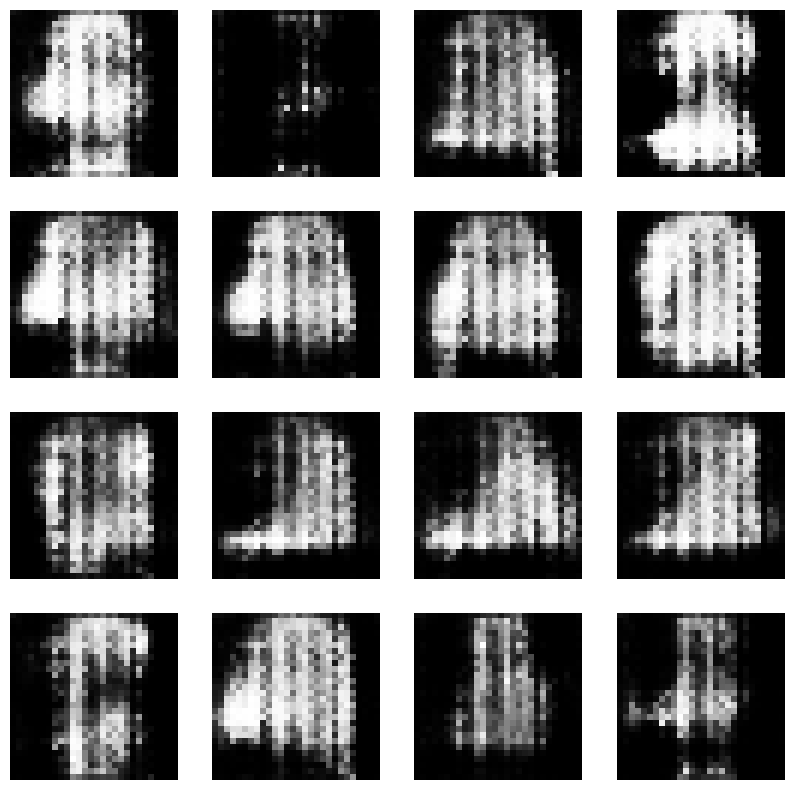

Epoch:  22


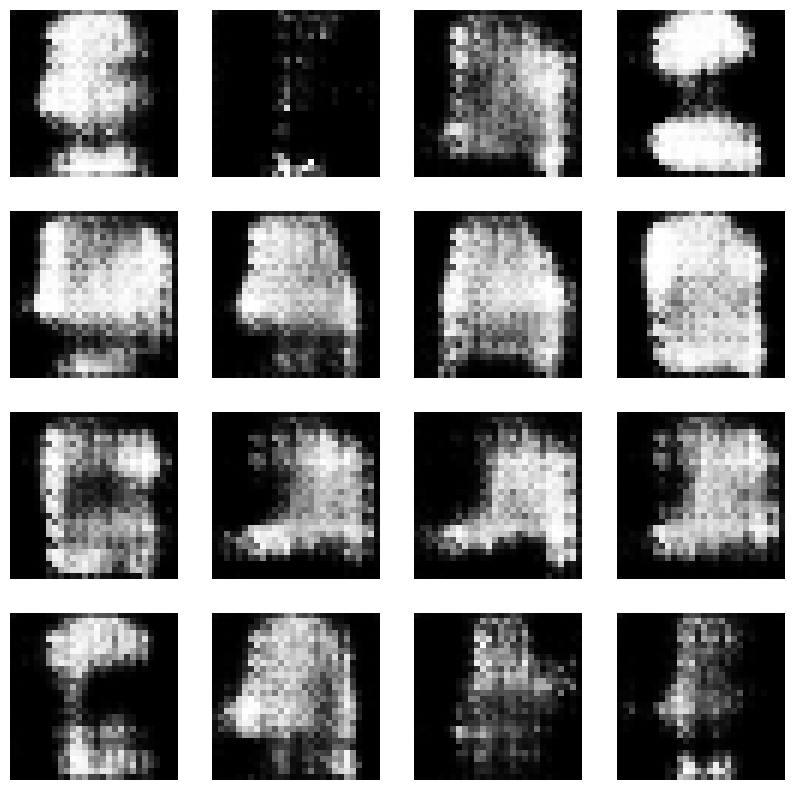

Epoch:  23


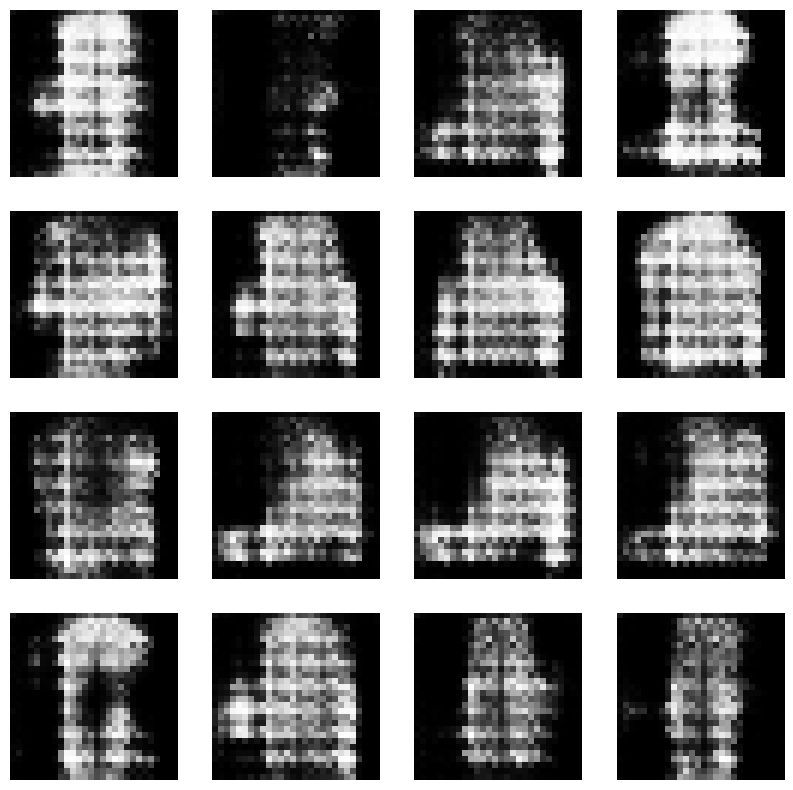

Epoch:  24


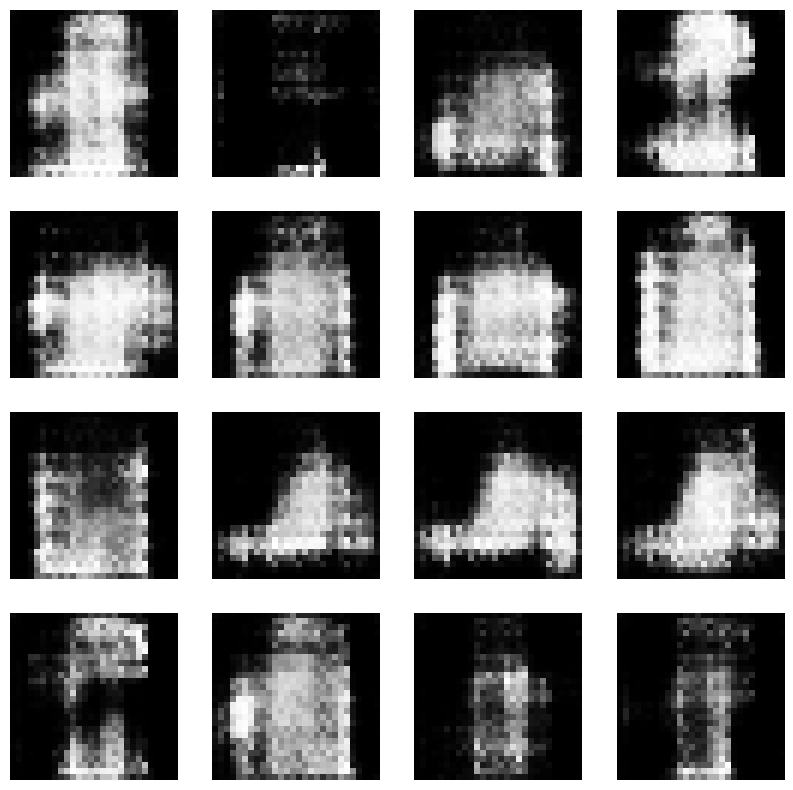

Epoch:  25


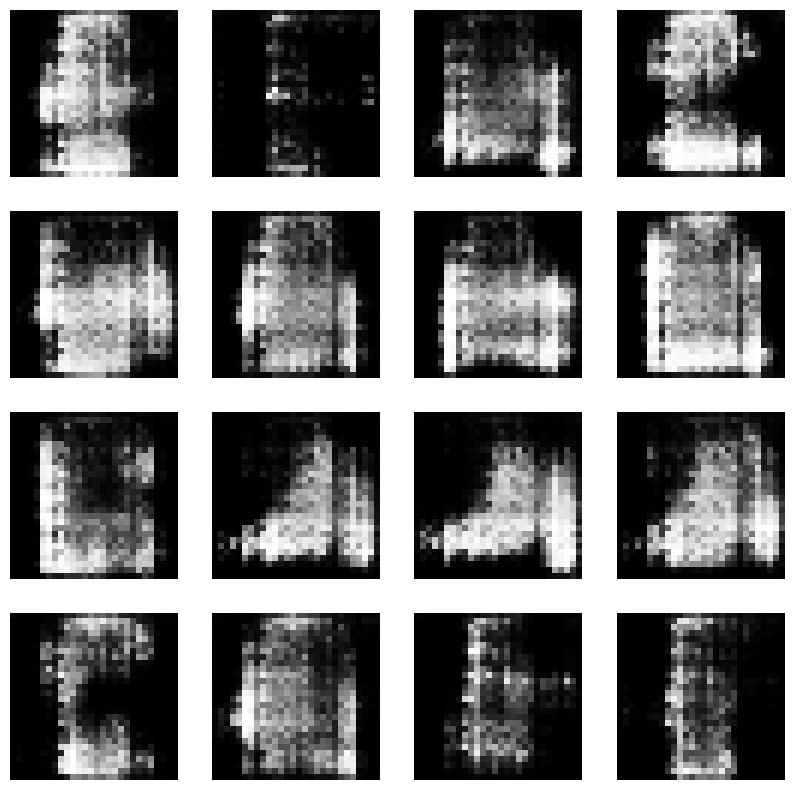

Epoch:  26


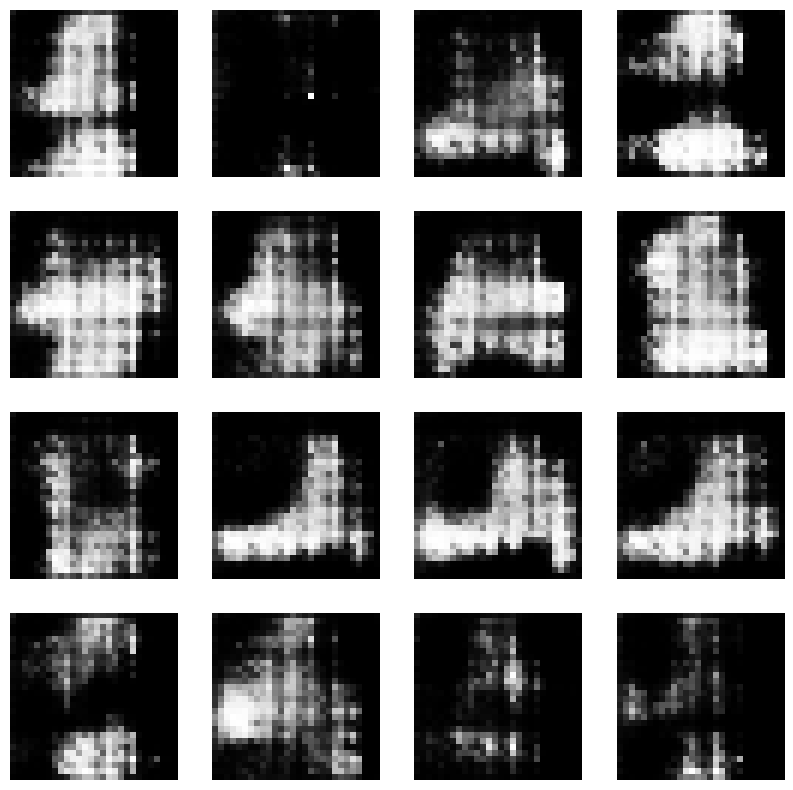

Epoch:  27


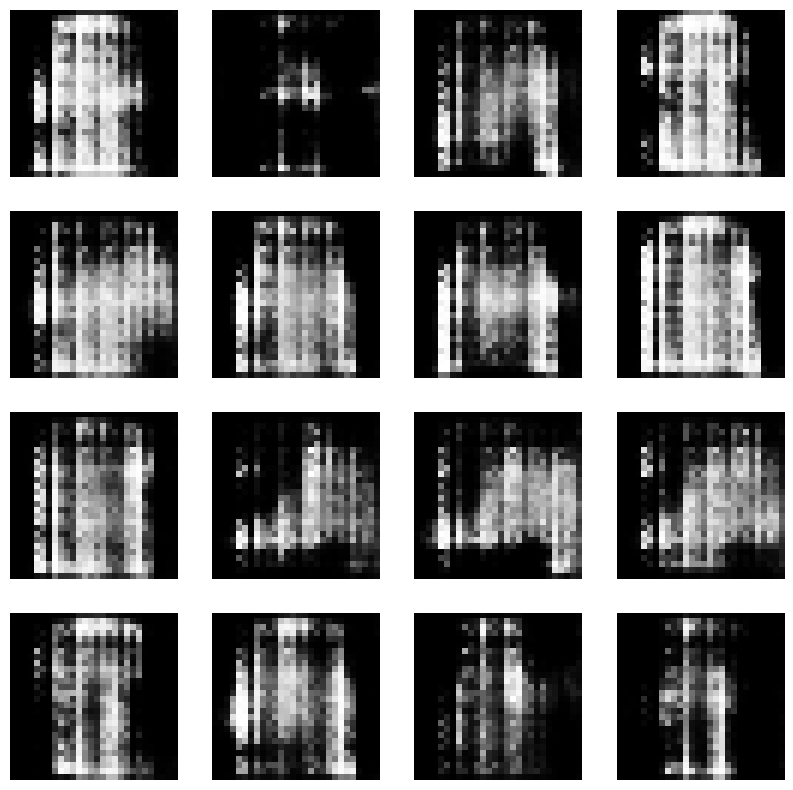

Epoch:  28


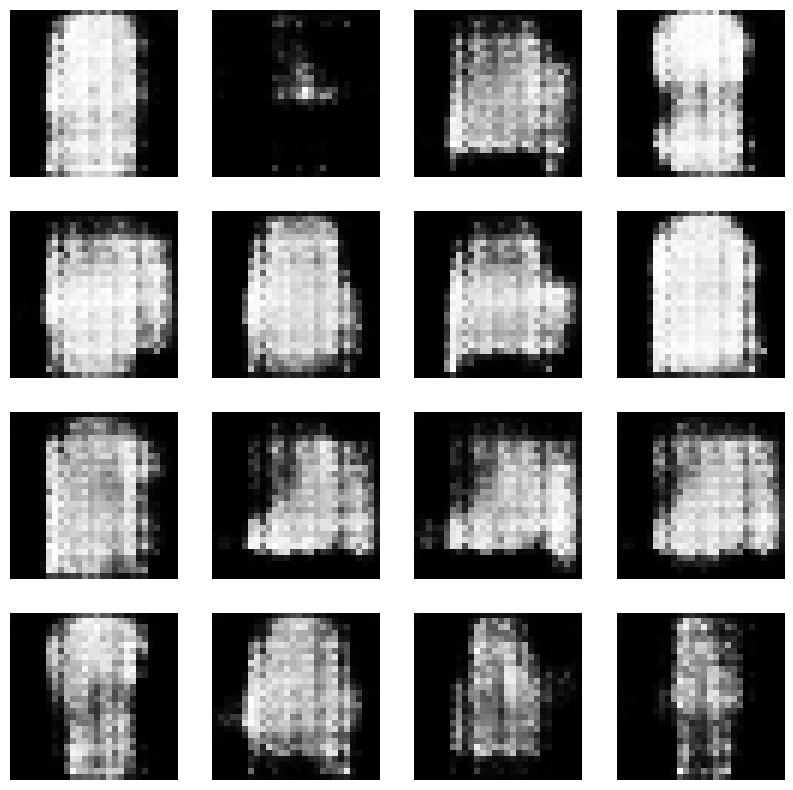

Epoch:  29


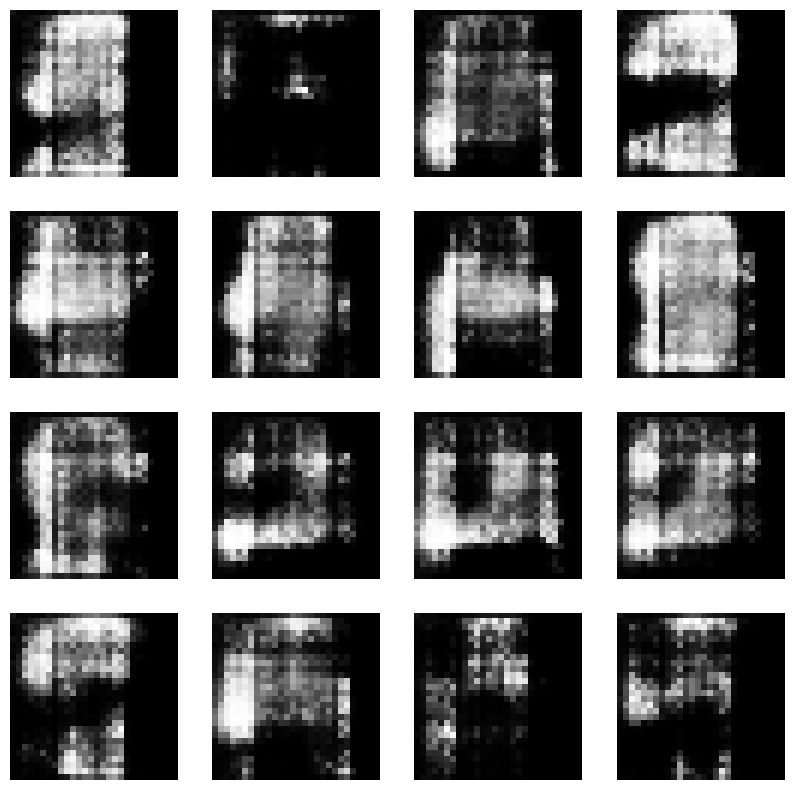

Epoch:  30


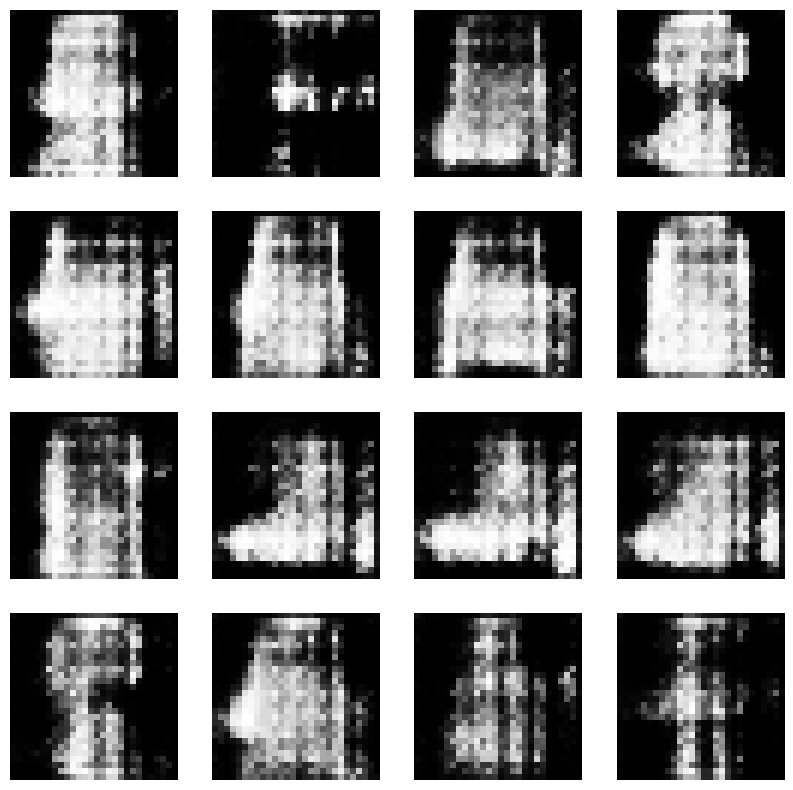

Epoch:  31


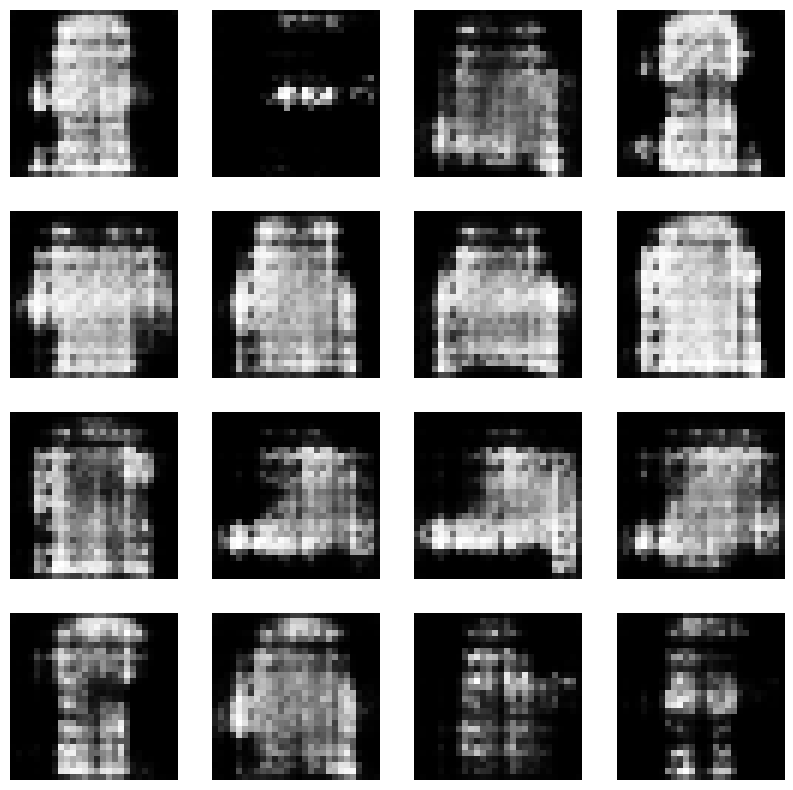

Epoch:  32


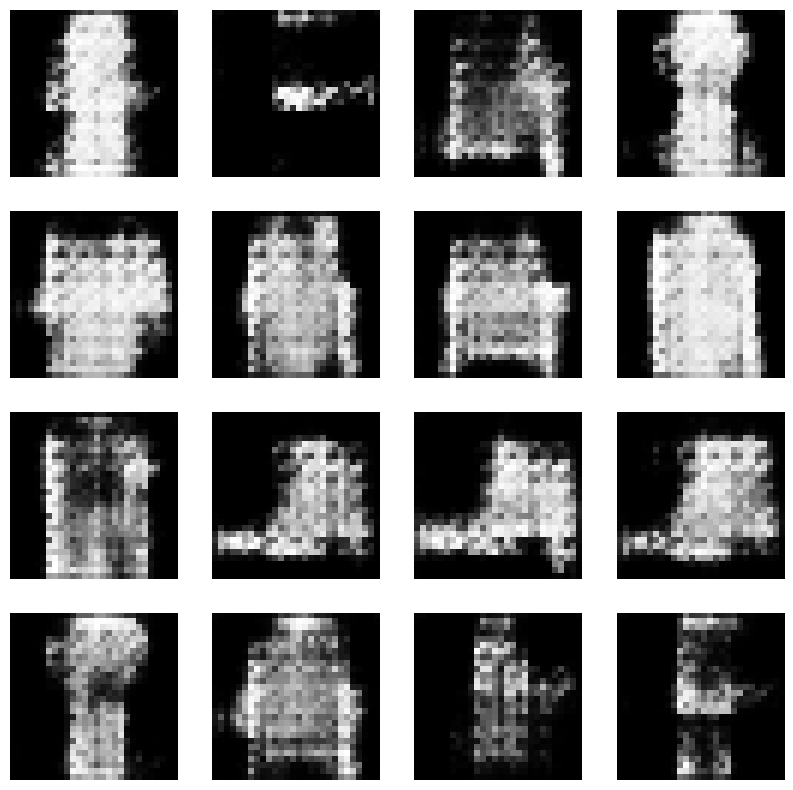

Epoch:  33


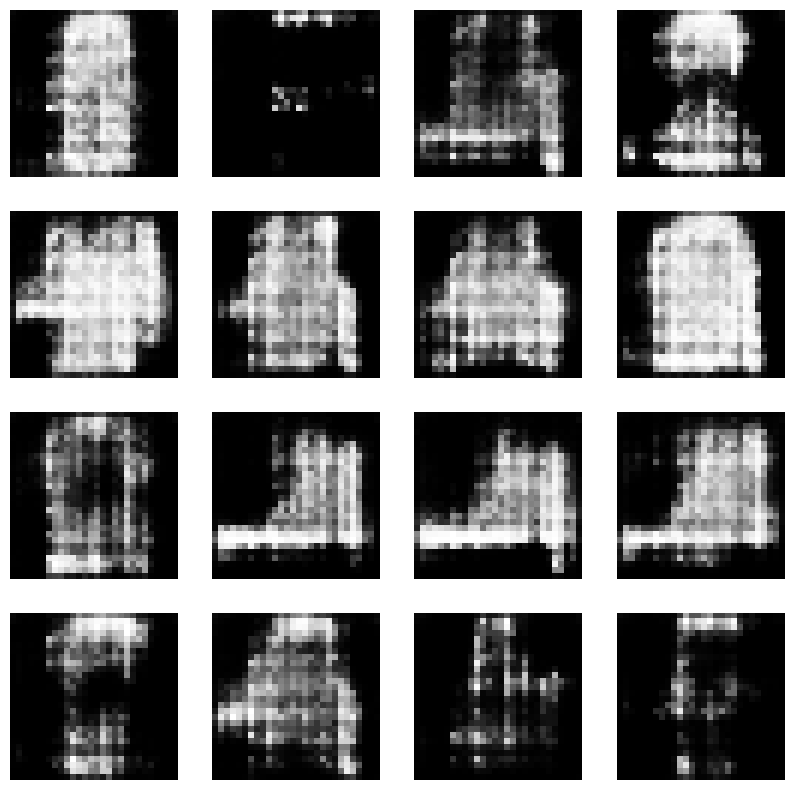

Epoch:  34


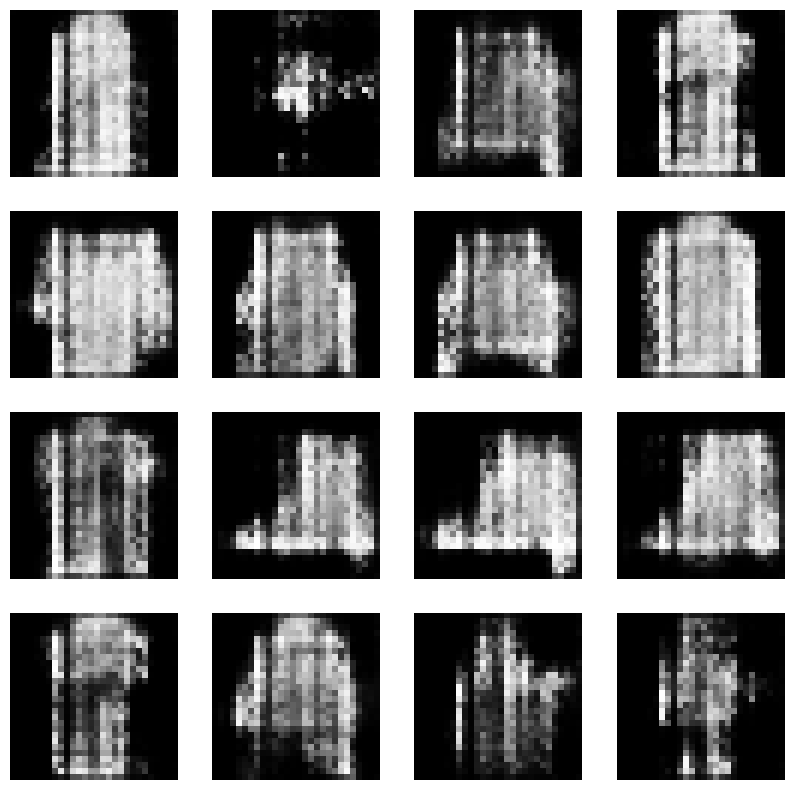

Epoch:  35


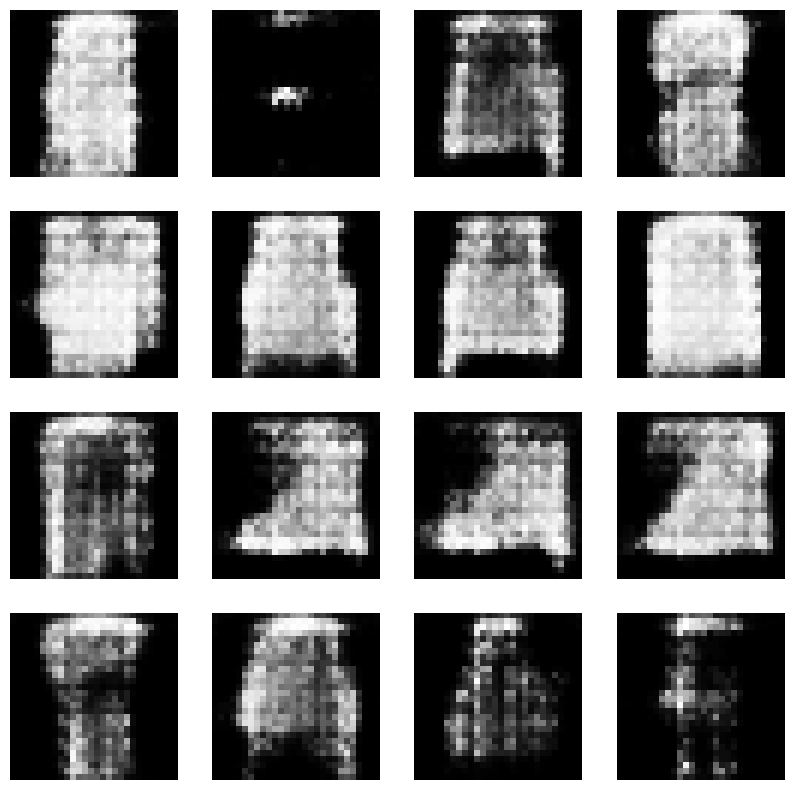

Epoch:  36


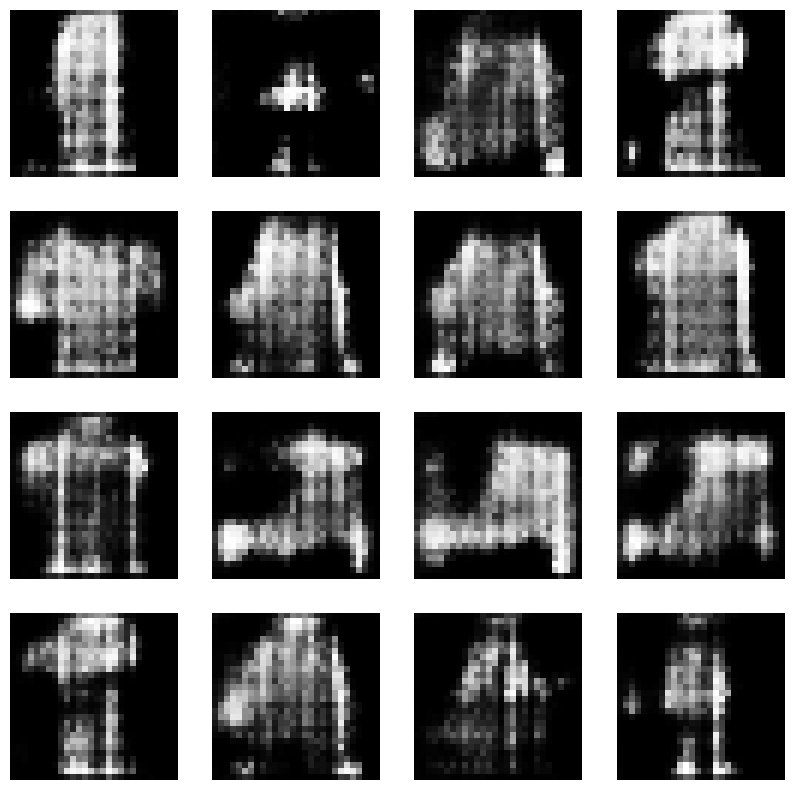

Epoch:  37


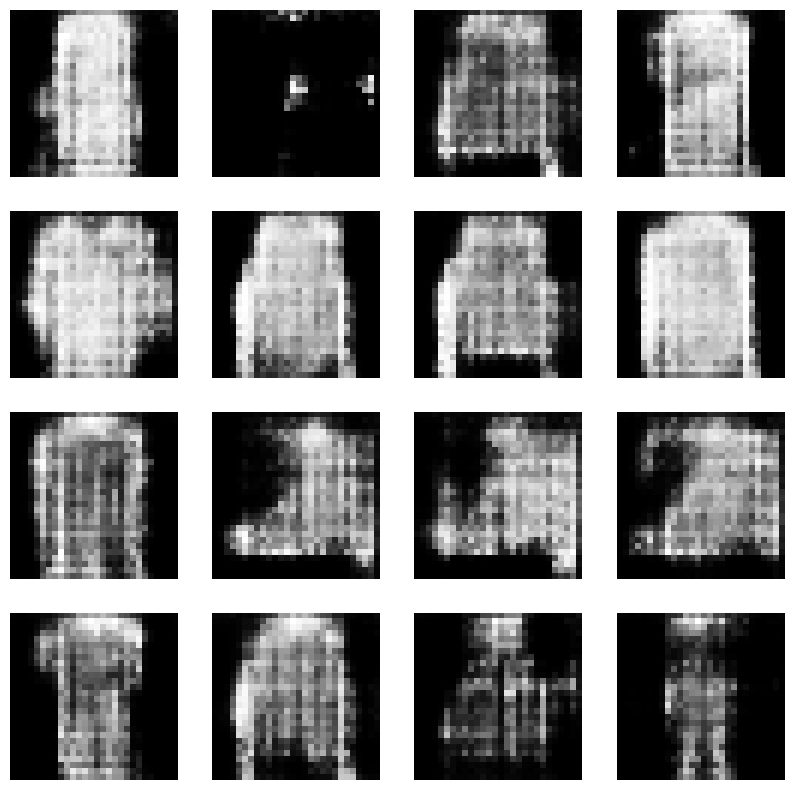

Epoch:  38


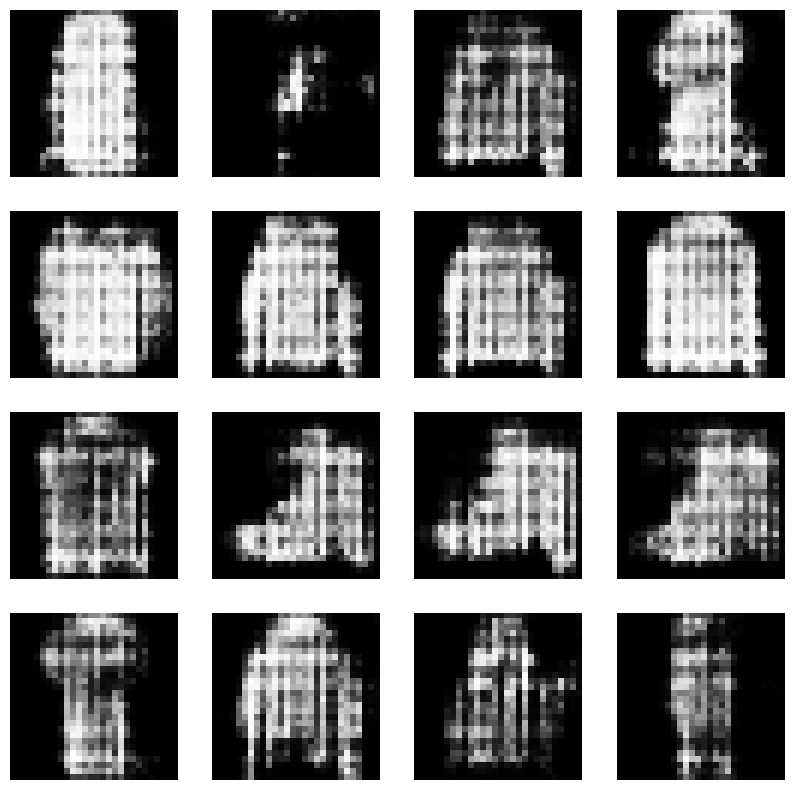

Epoch:  39


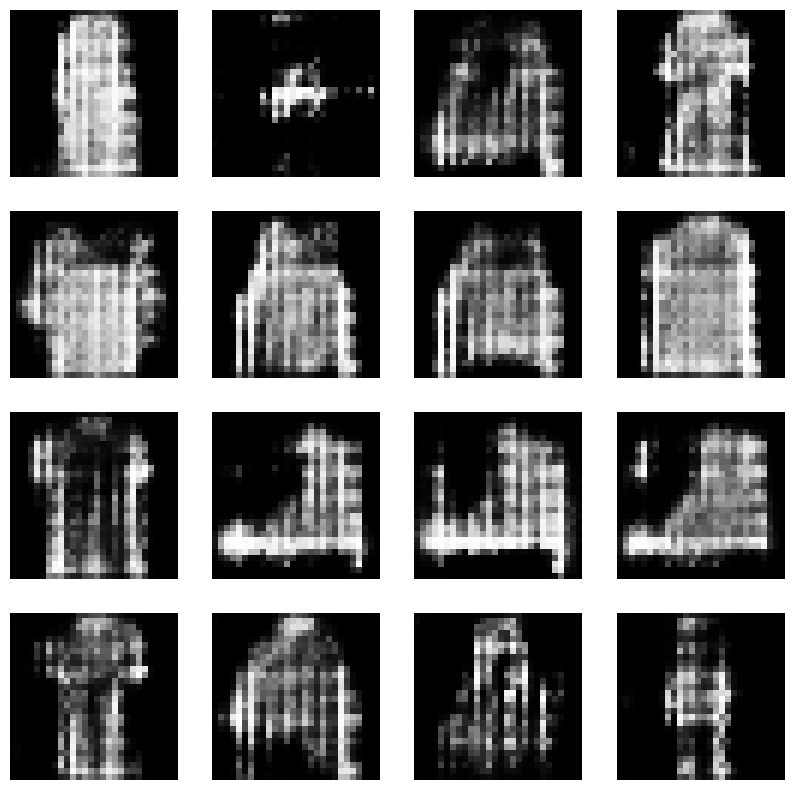

Epoch:  40


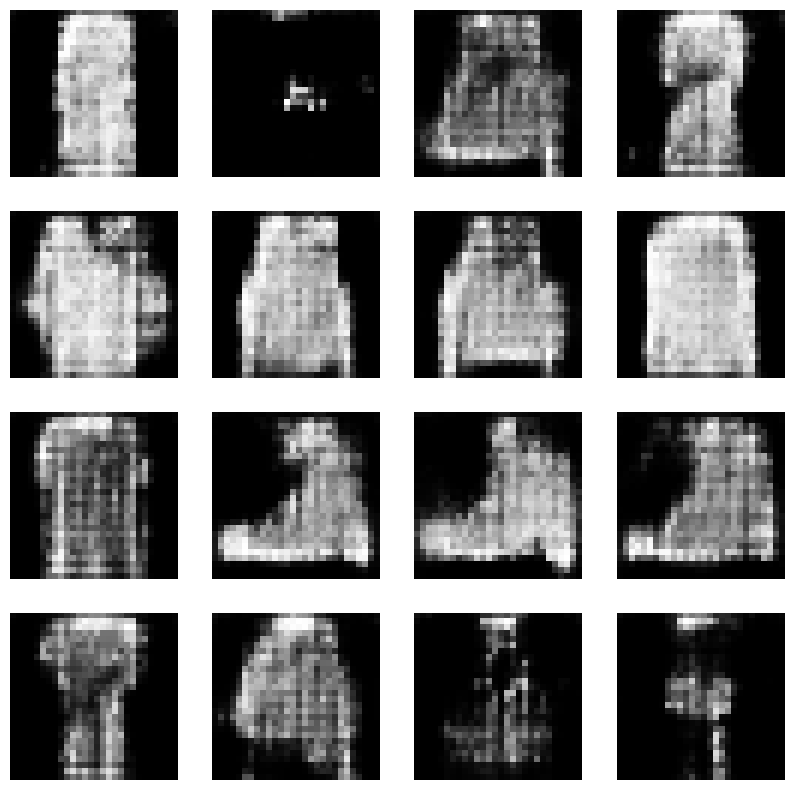

Epoch:  41


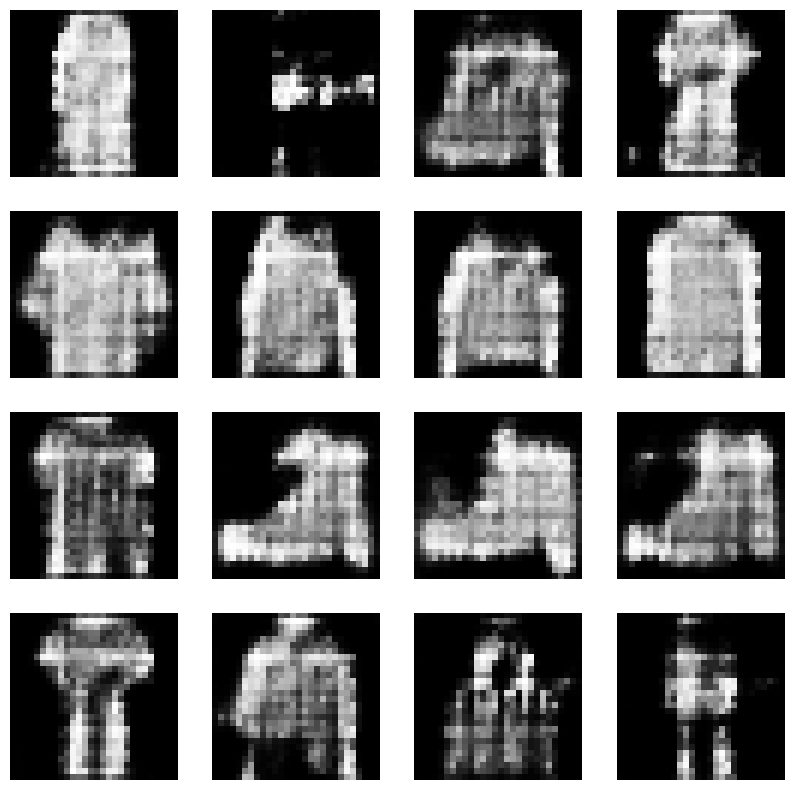

Epoch:  42


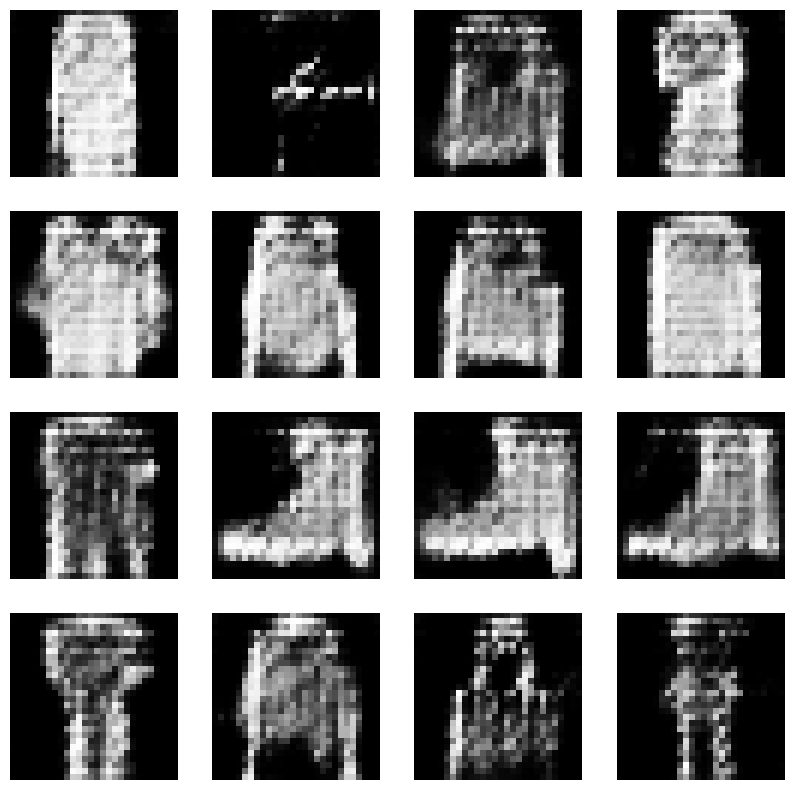

Epoch:  43


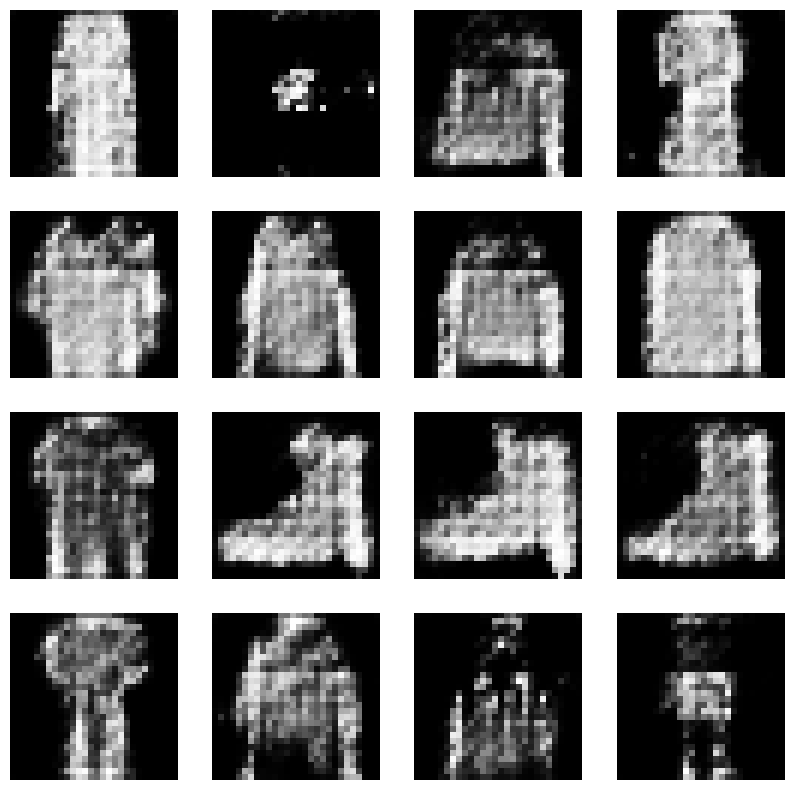

Epoch:  44


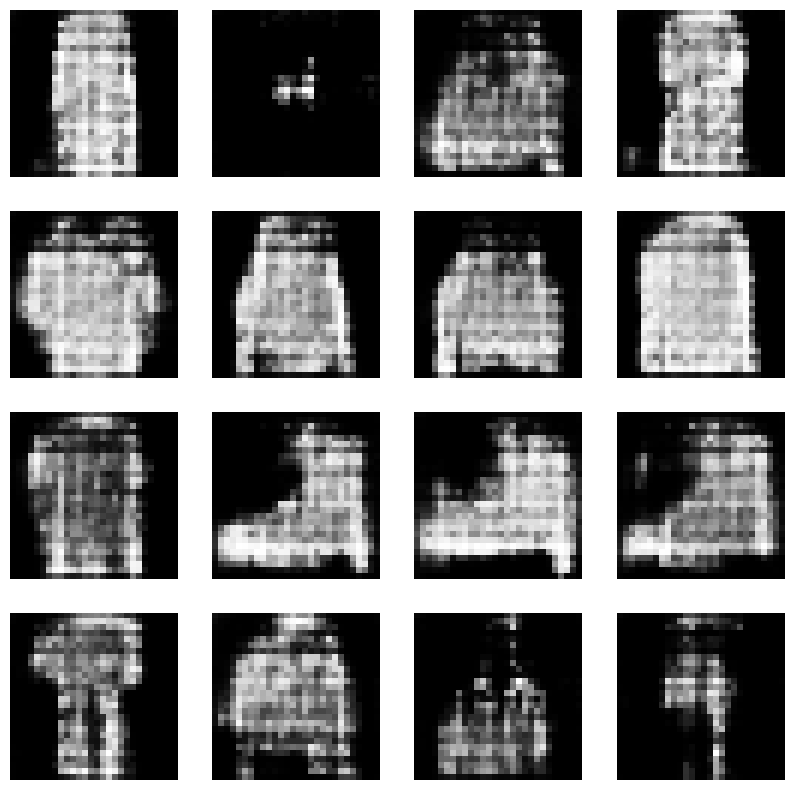

Epoch:  45


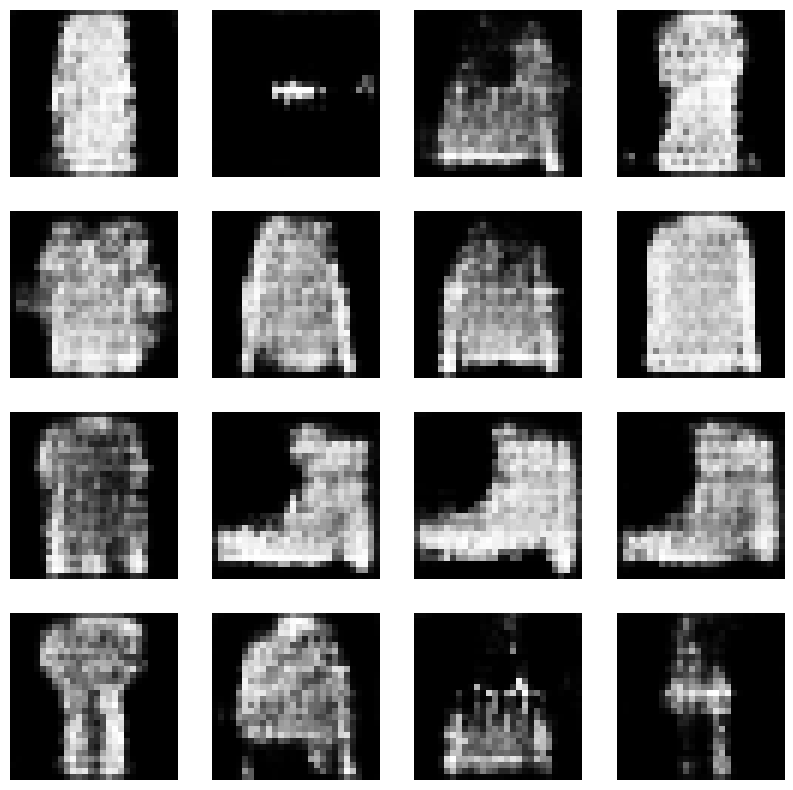

Epoch:  46


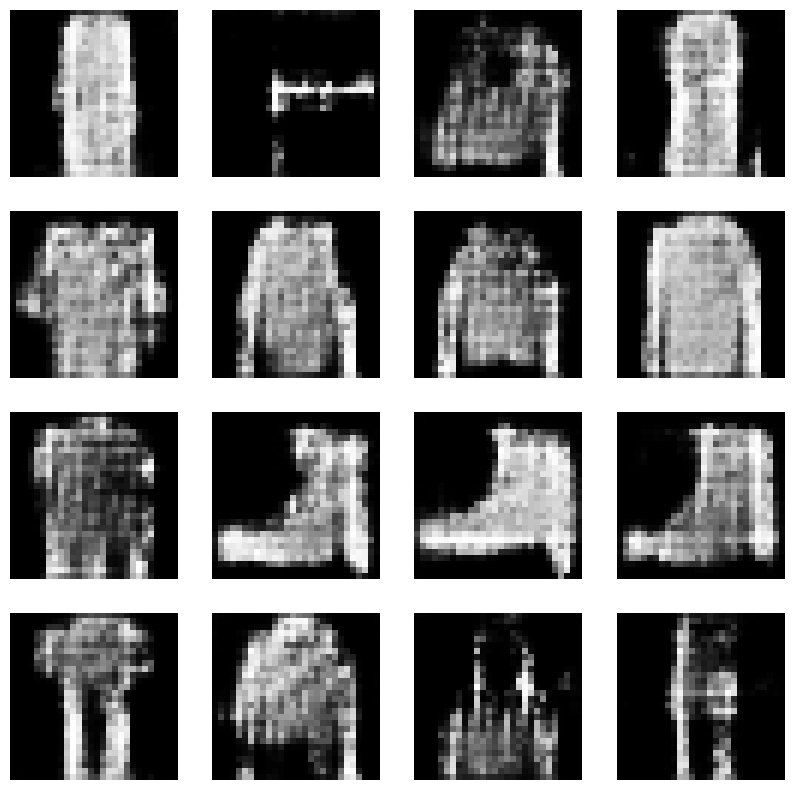

Epoch:  47


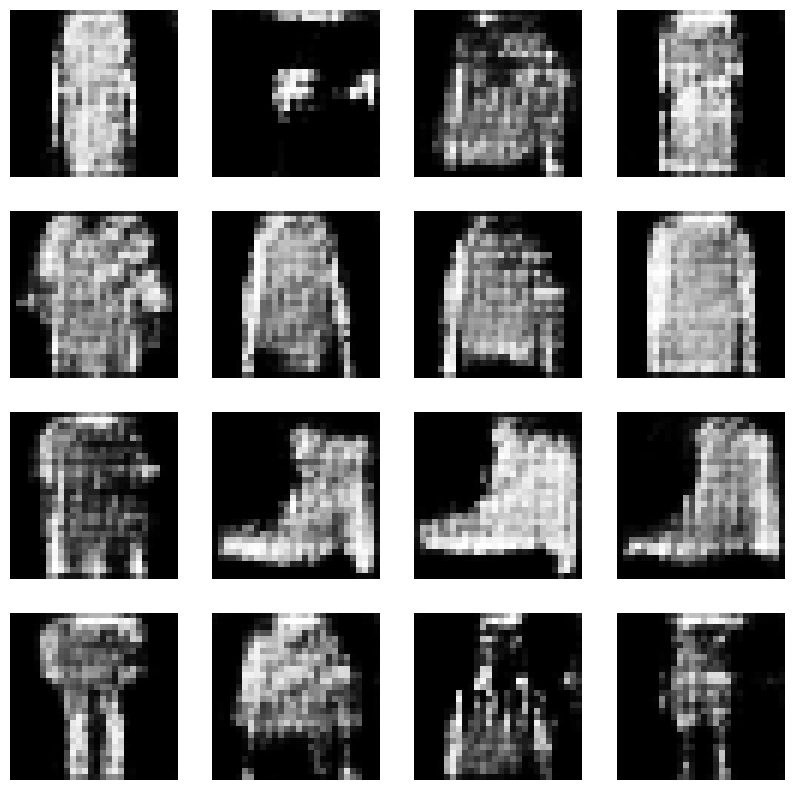

Epoch:  48


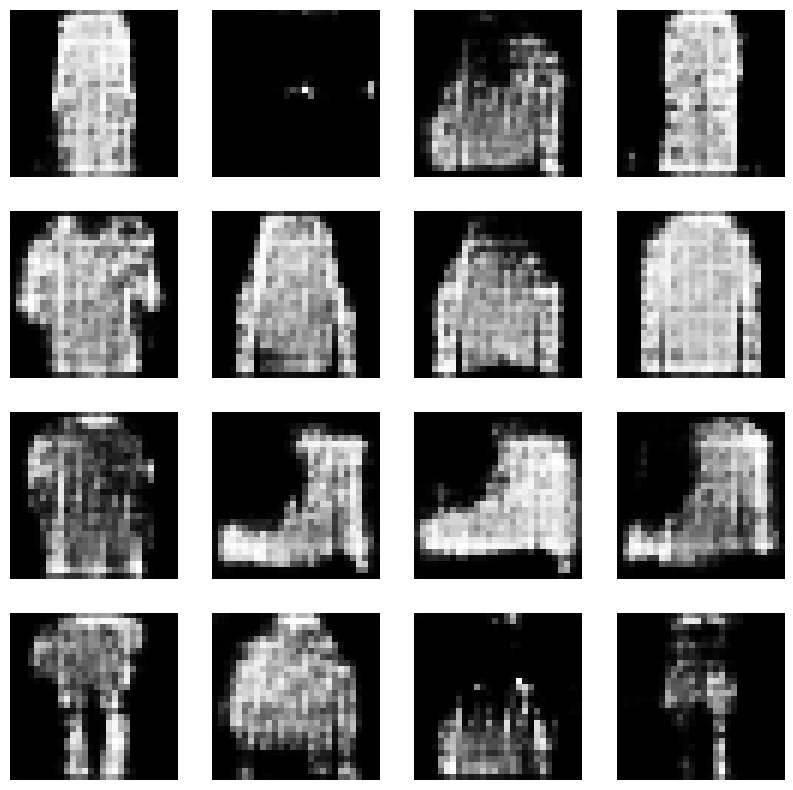

Epoch:  49


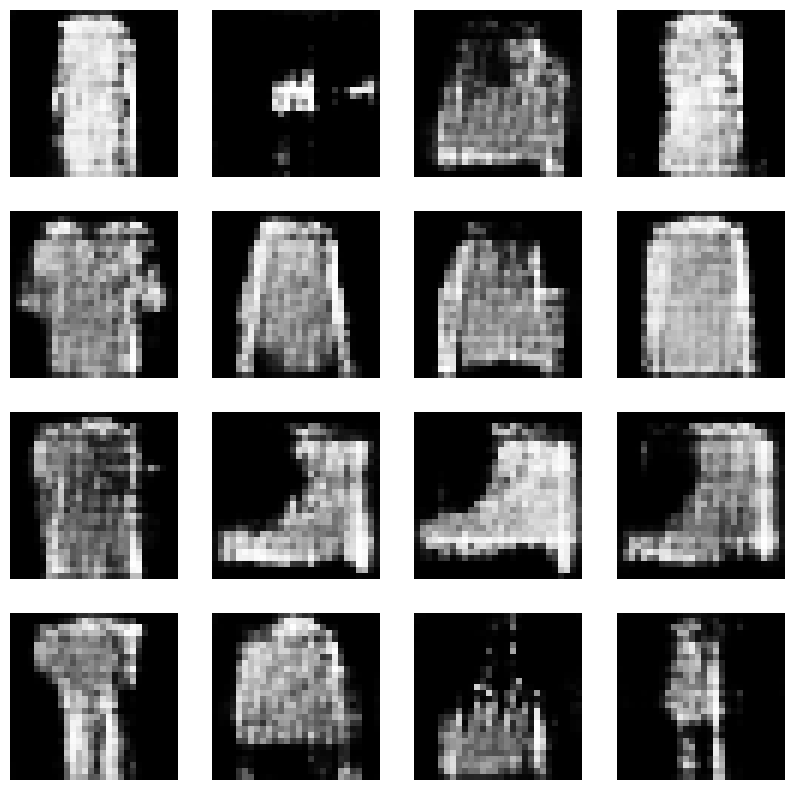

Epoch:  50


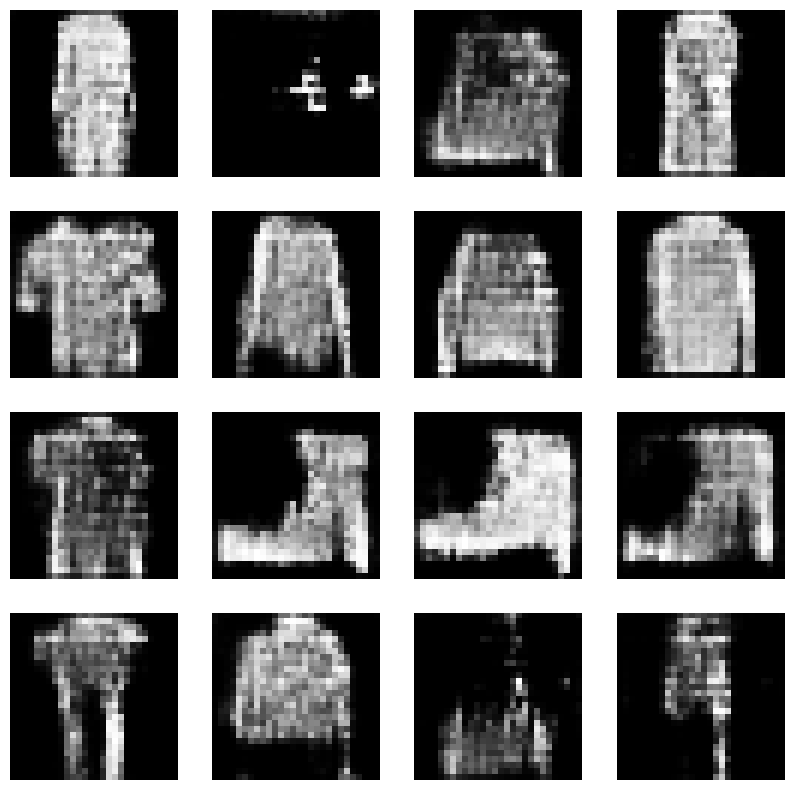

Epoch:  51


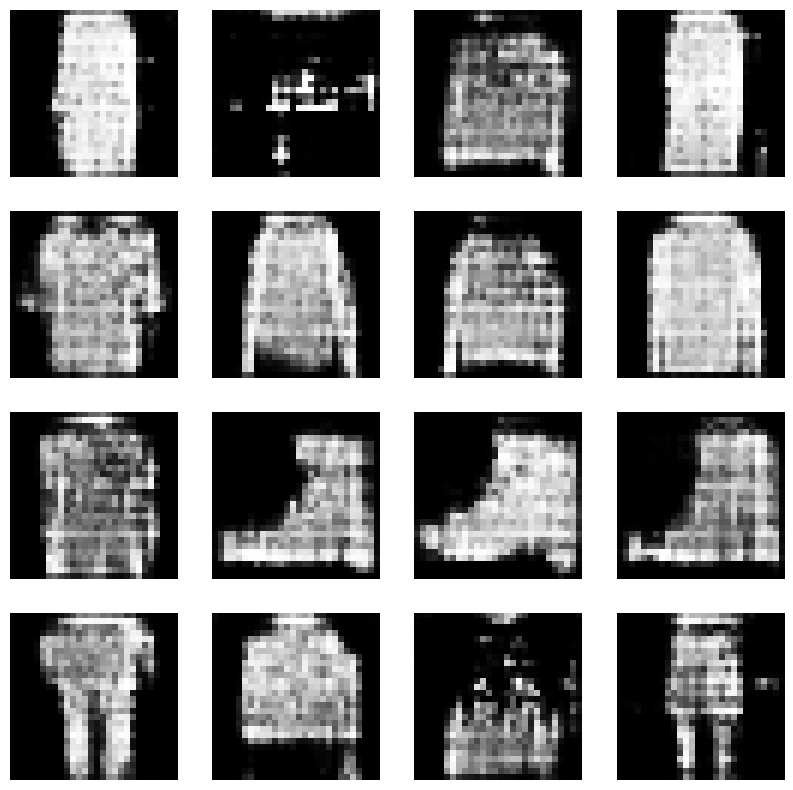

Epoch:  52


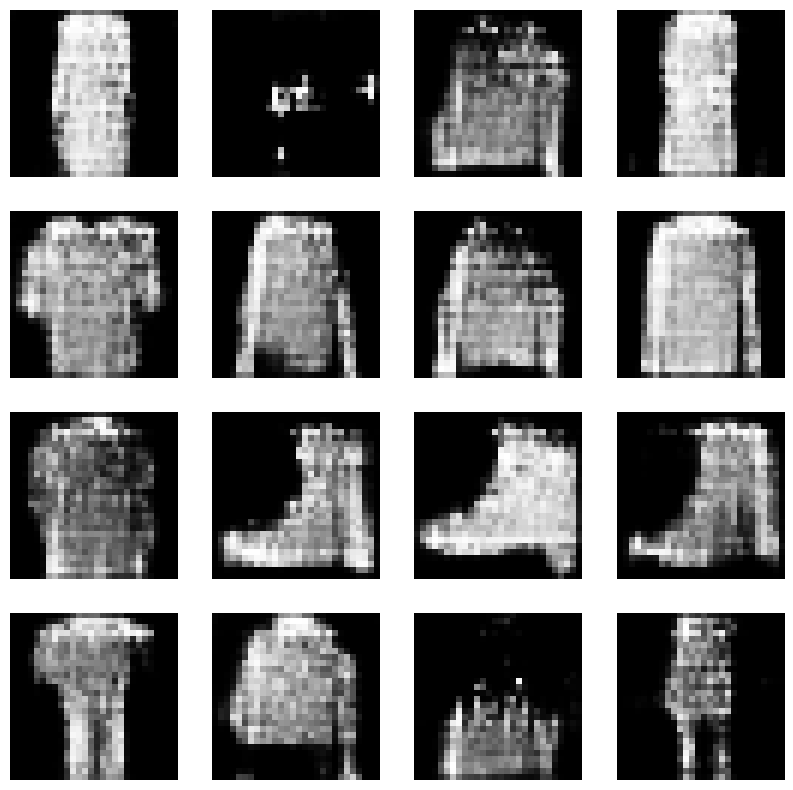

Epoch:  53


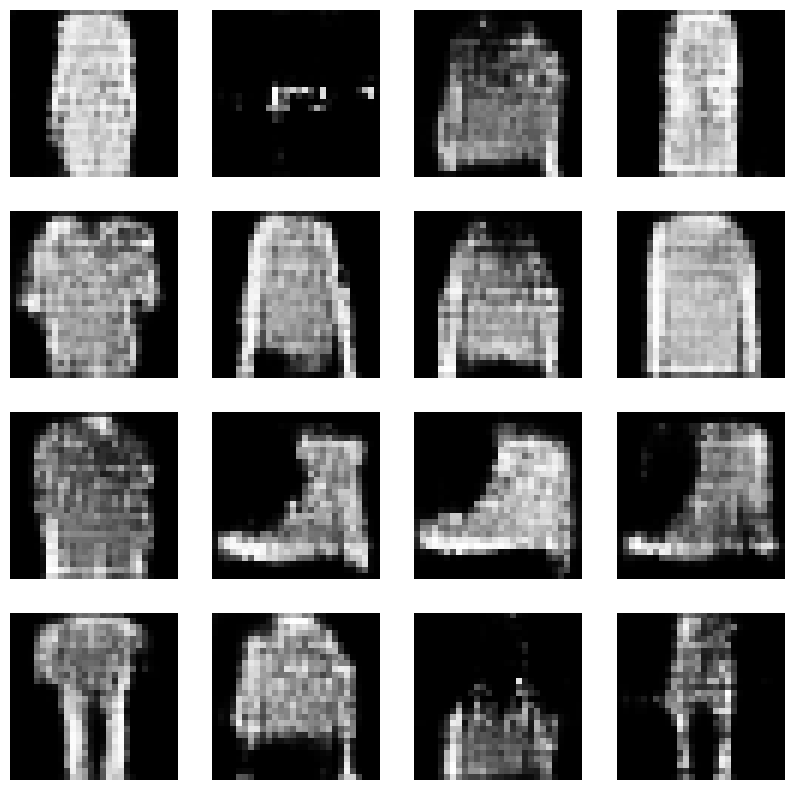

Epoch:  54


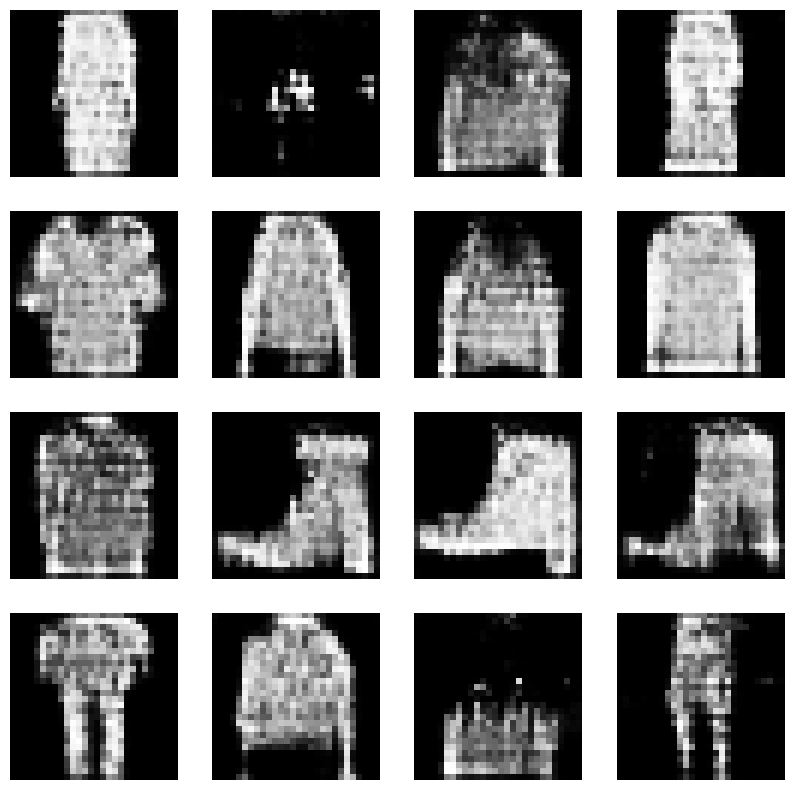

Epoch:  55


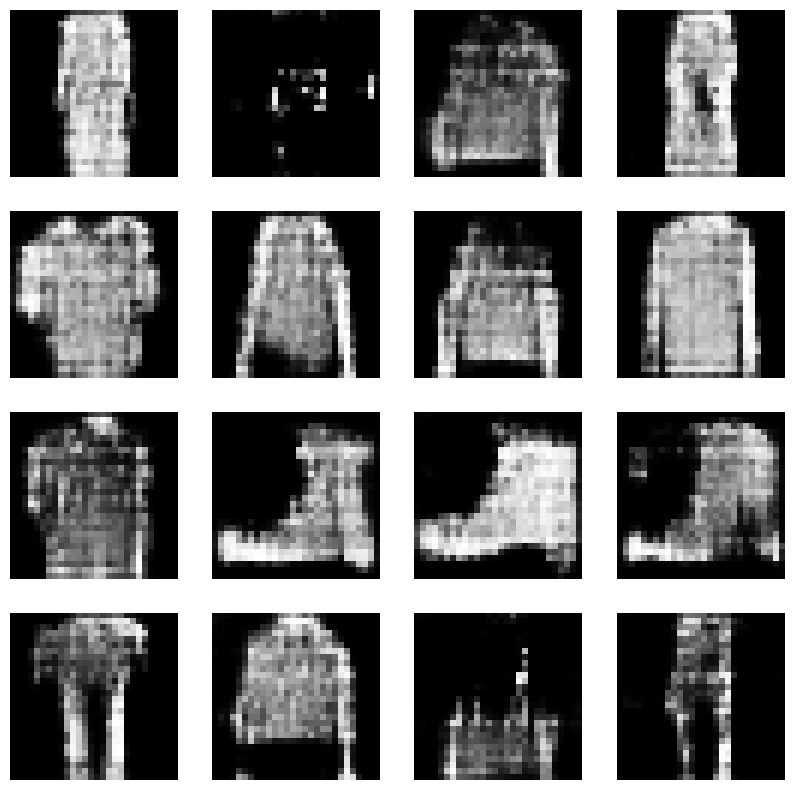

Epoch:  56


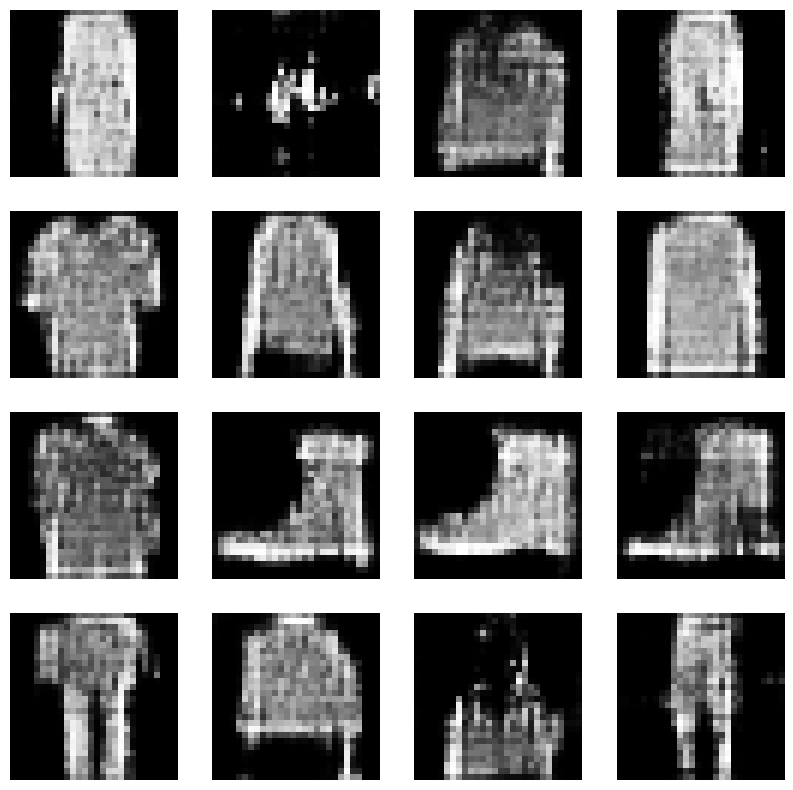

Epoch:  57


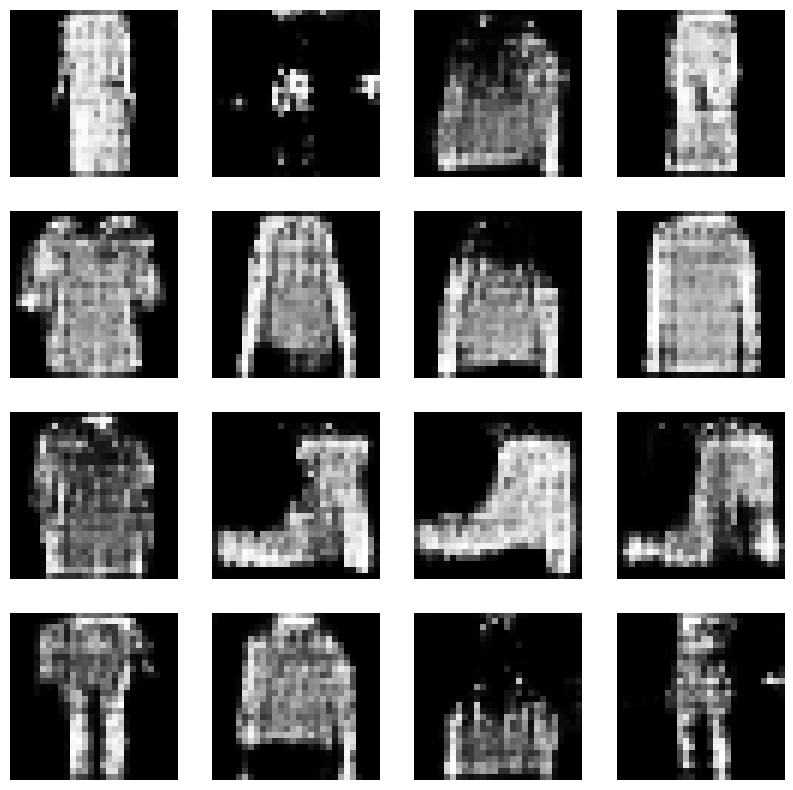

Epoch:  58


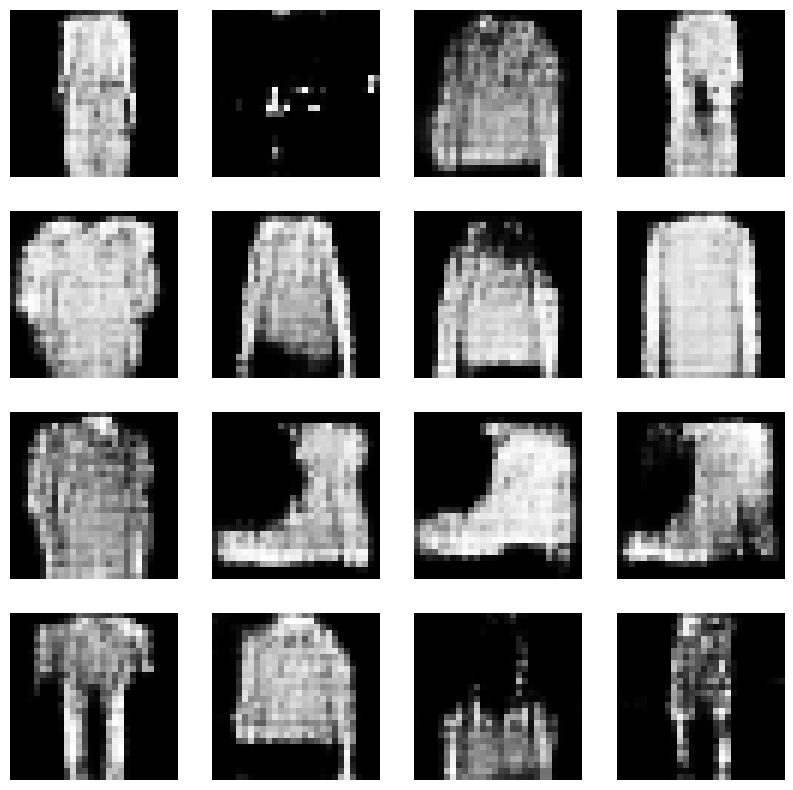

Epoch:  59


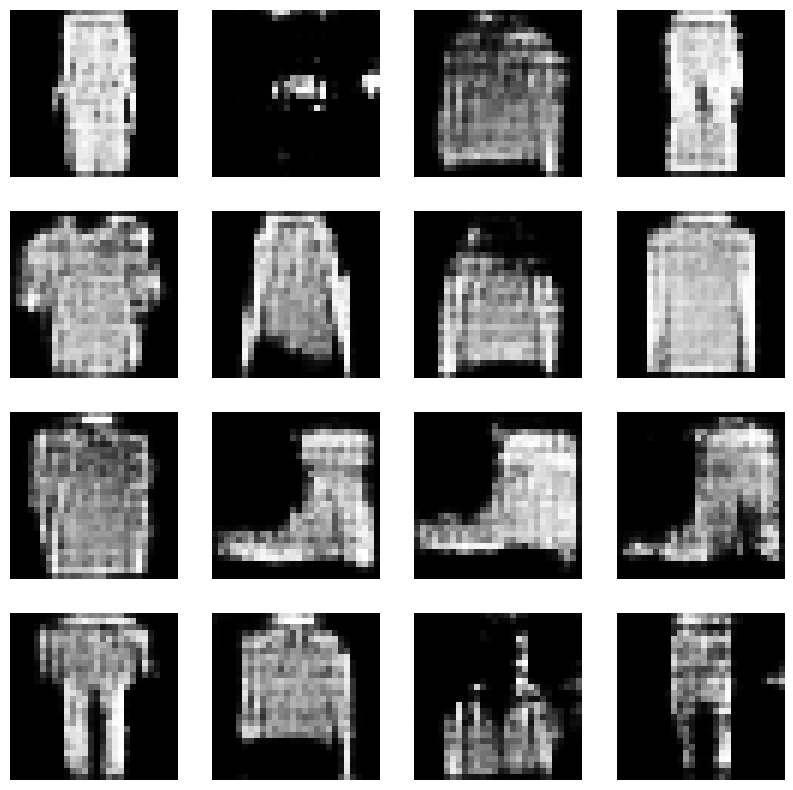

Epoch:  60


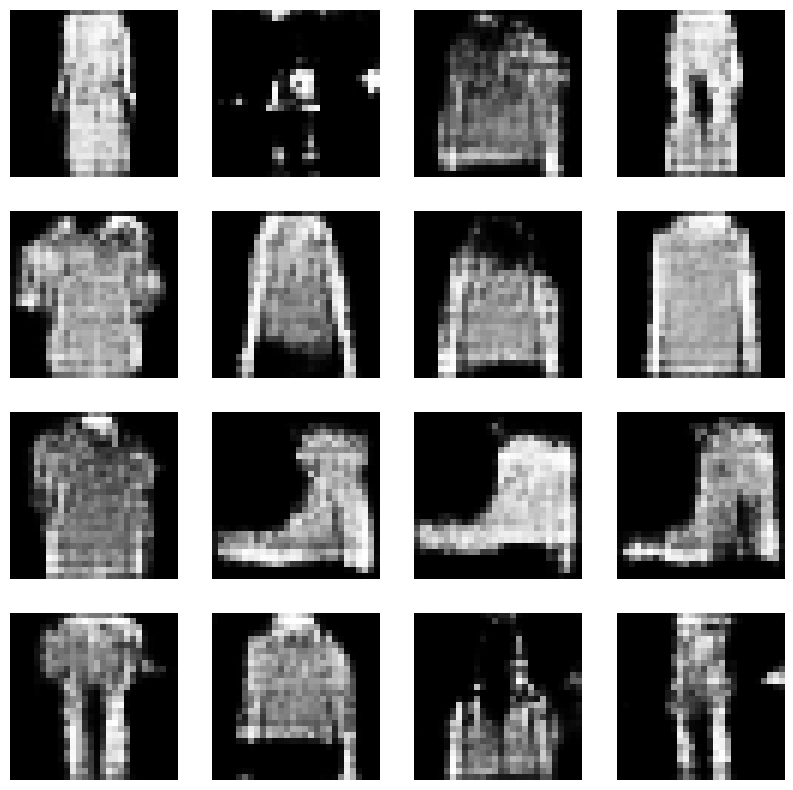

Epoch:  61


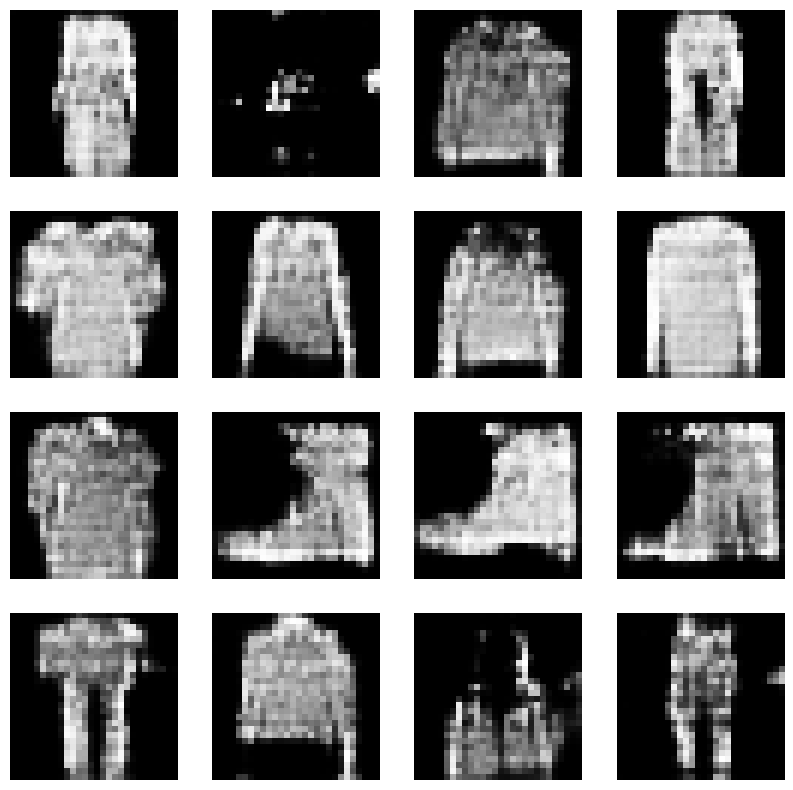

Epoch:  62


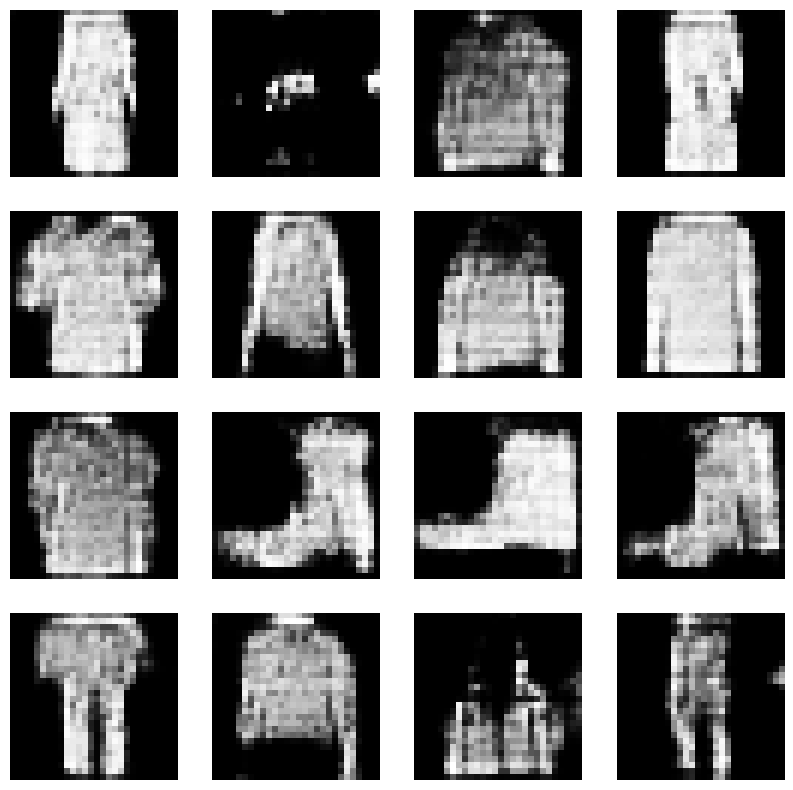

Epoch:  63


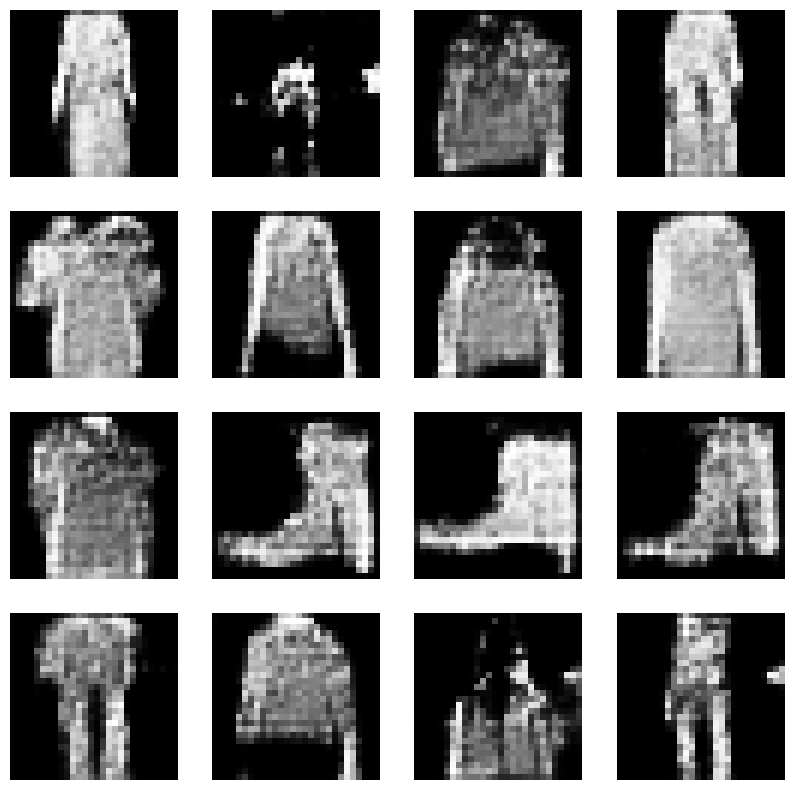

Epoch:  64


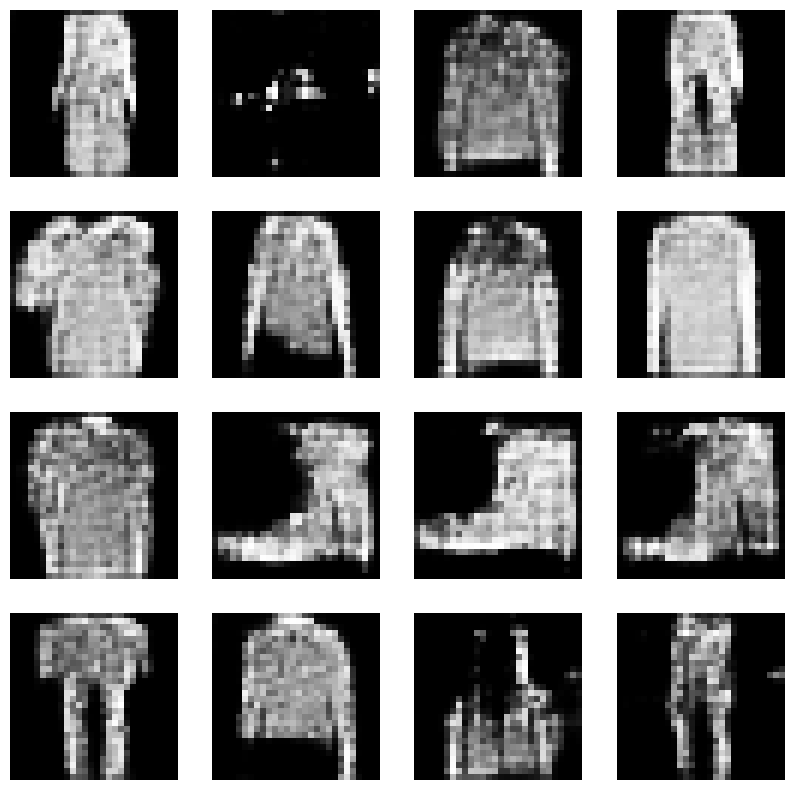

Epoch:  65


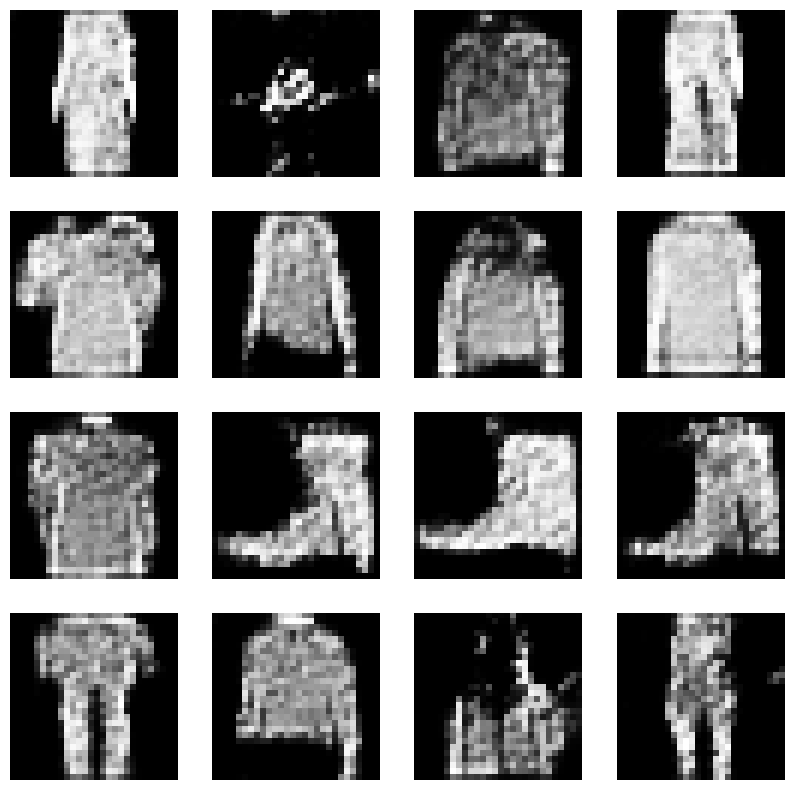

Epoch:  66


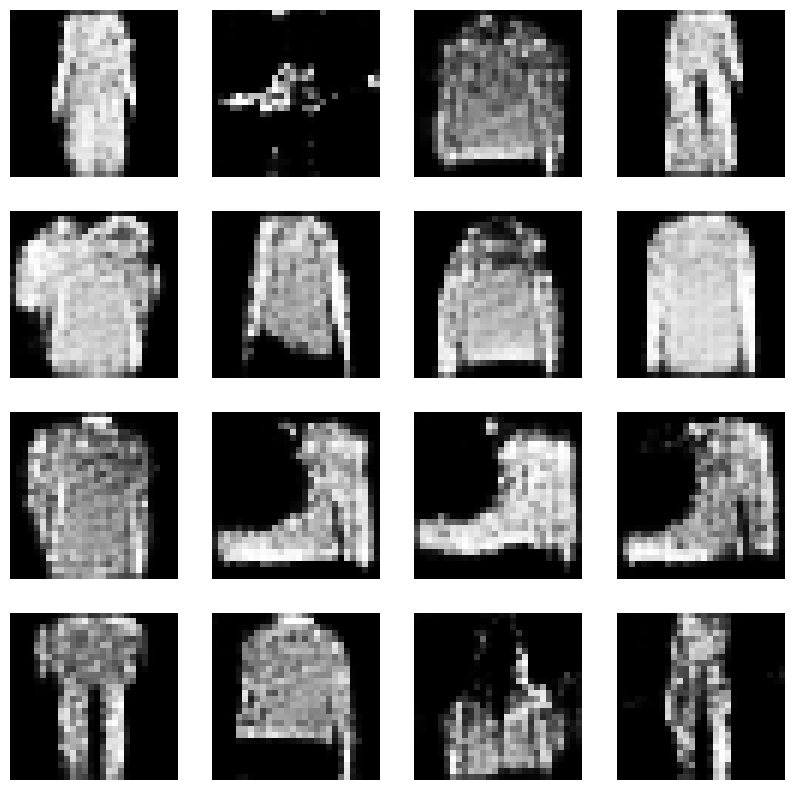

Epoch:  67


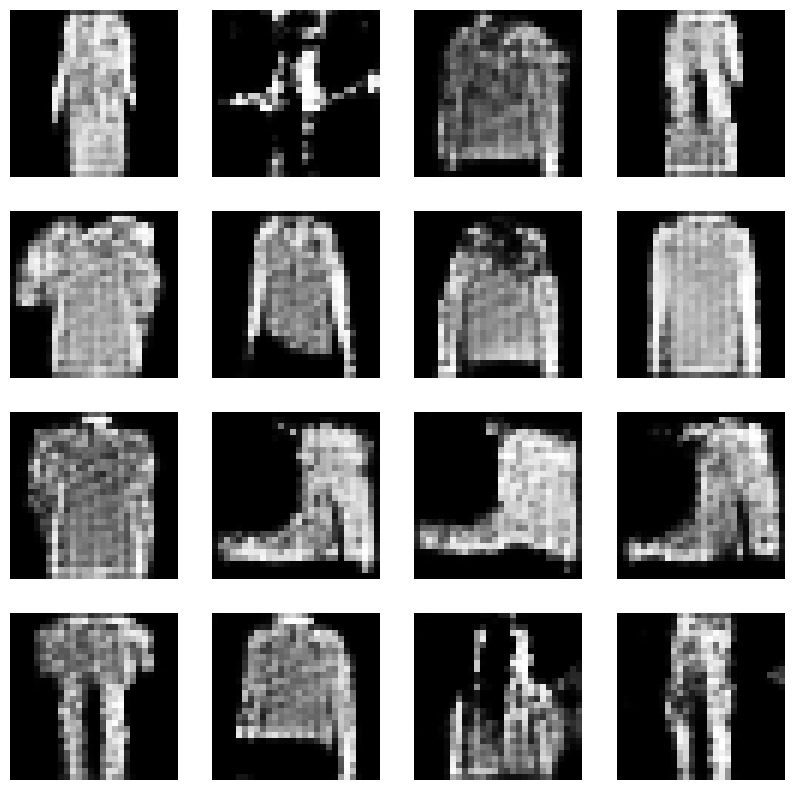

Epoch:  68


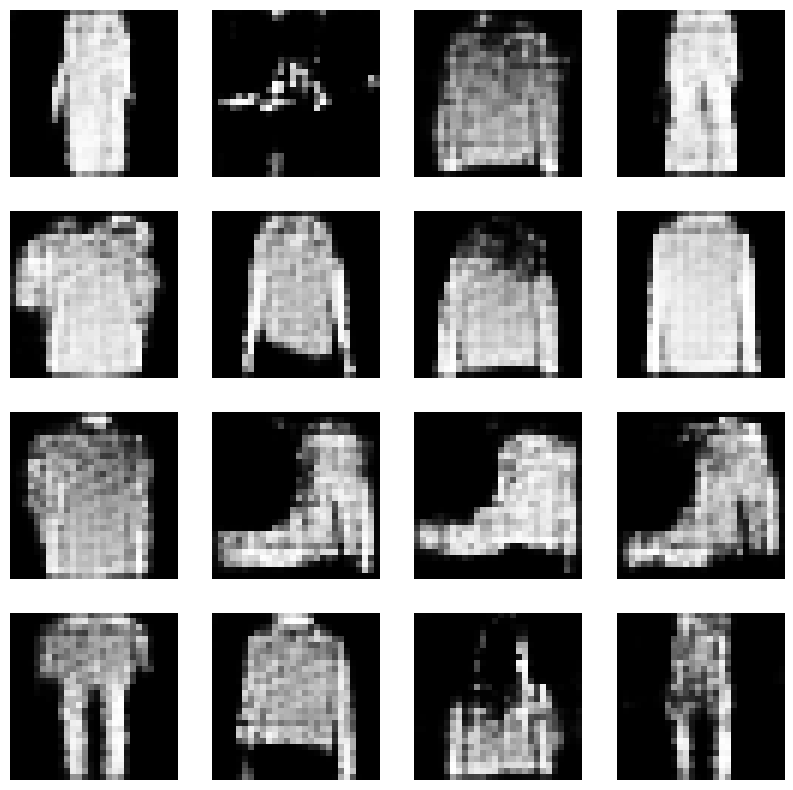

Epoch:  69


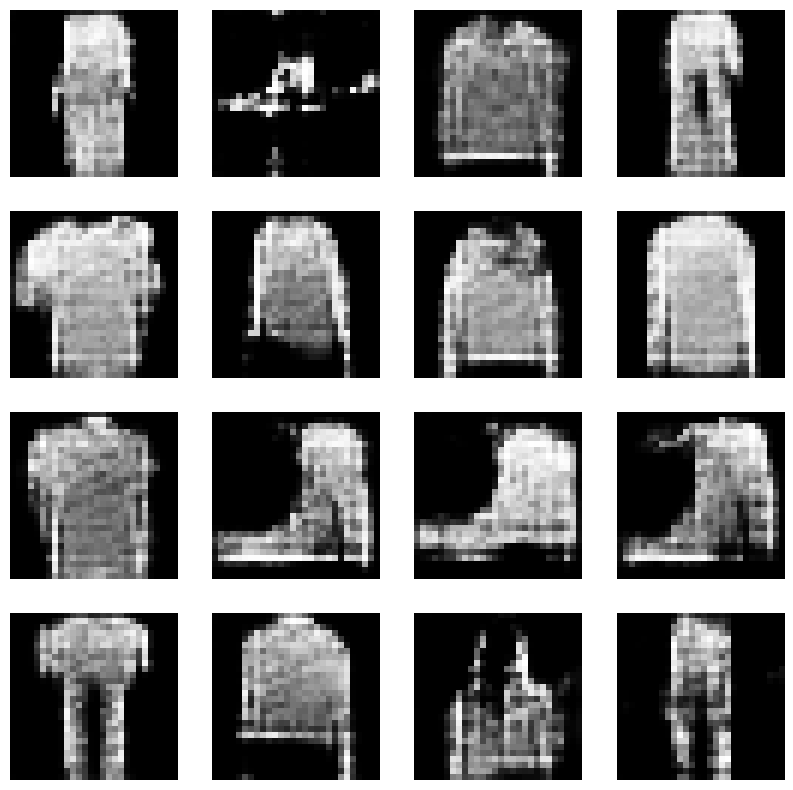

Epoch:  70


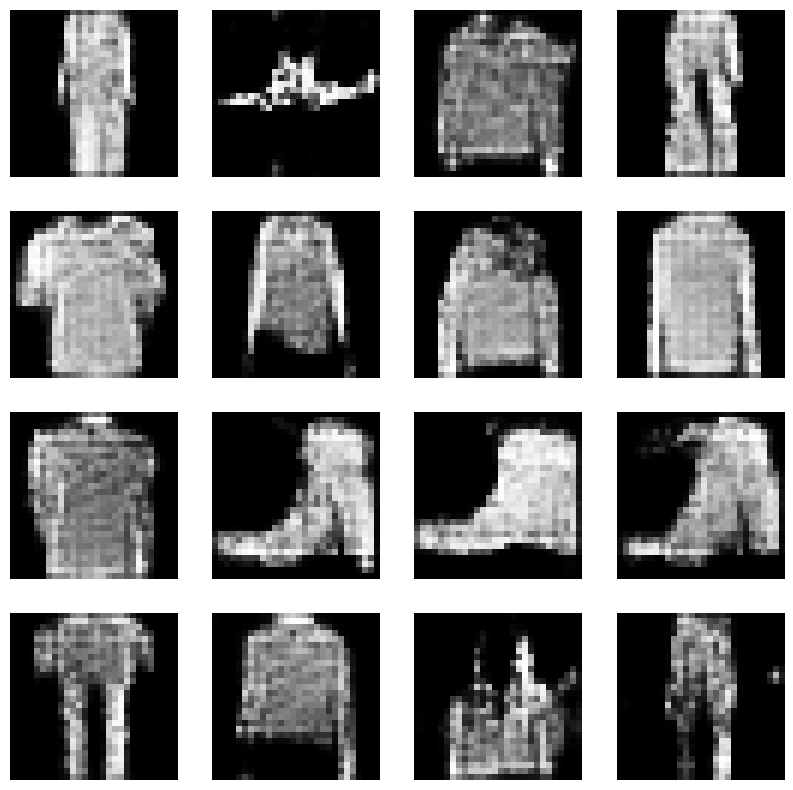

Epoch:  71


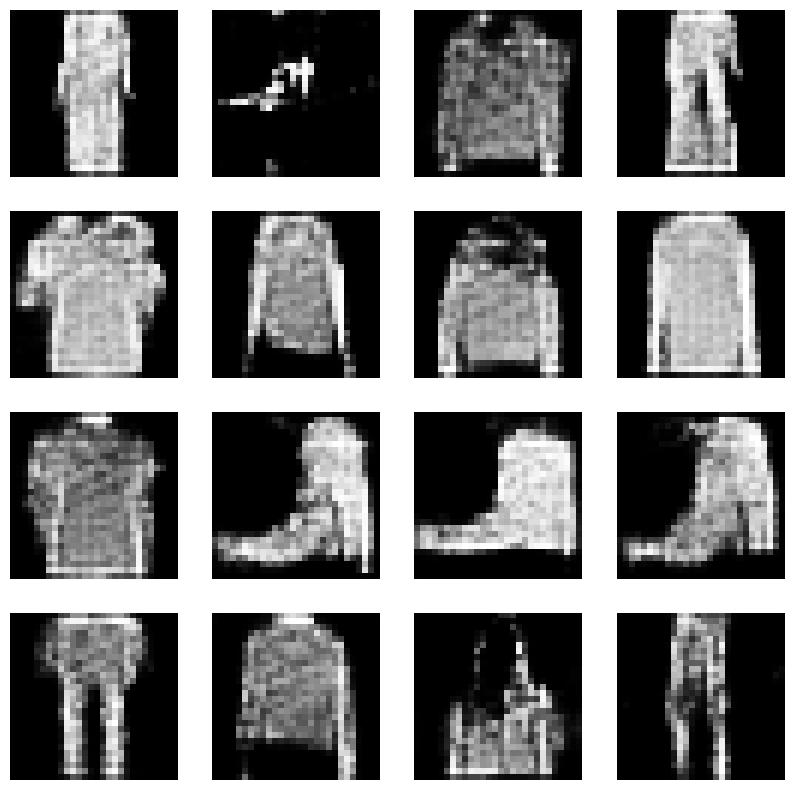

Epoch:  72


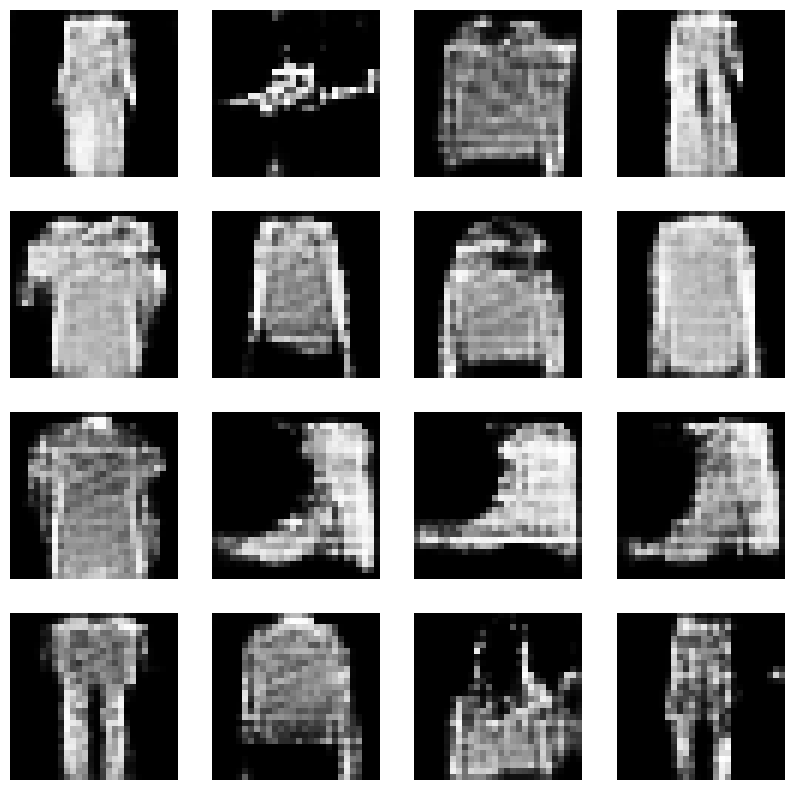

Epoch:  73


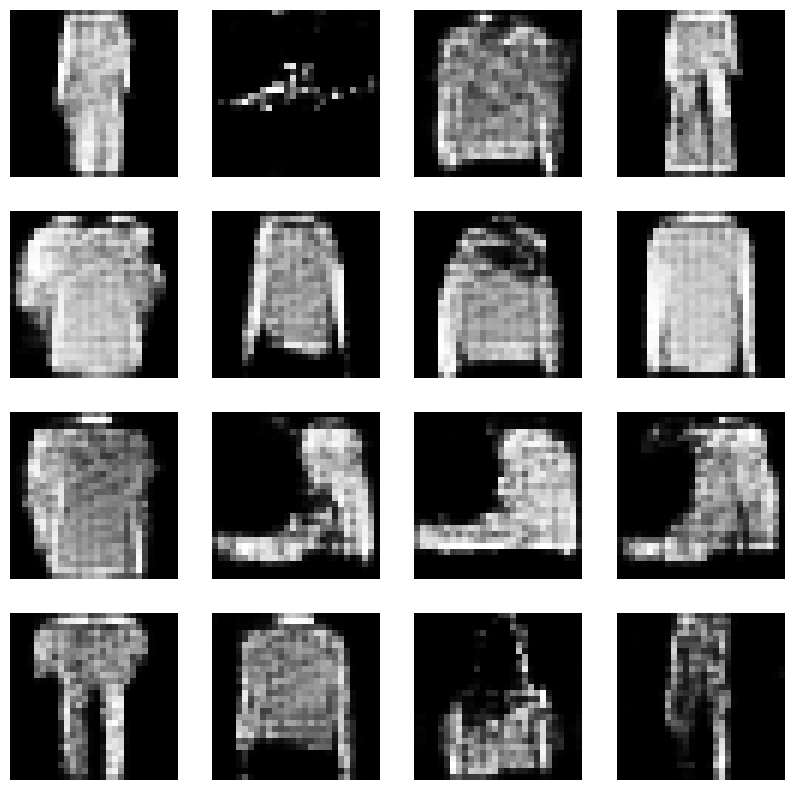

Epoch:  74


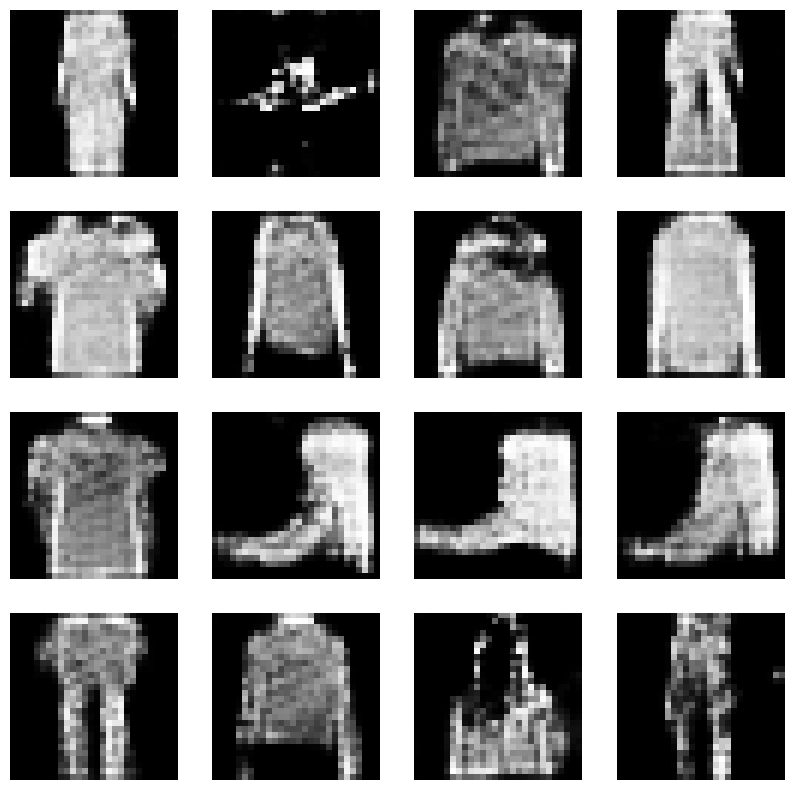

Epoch:  75


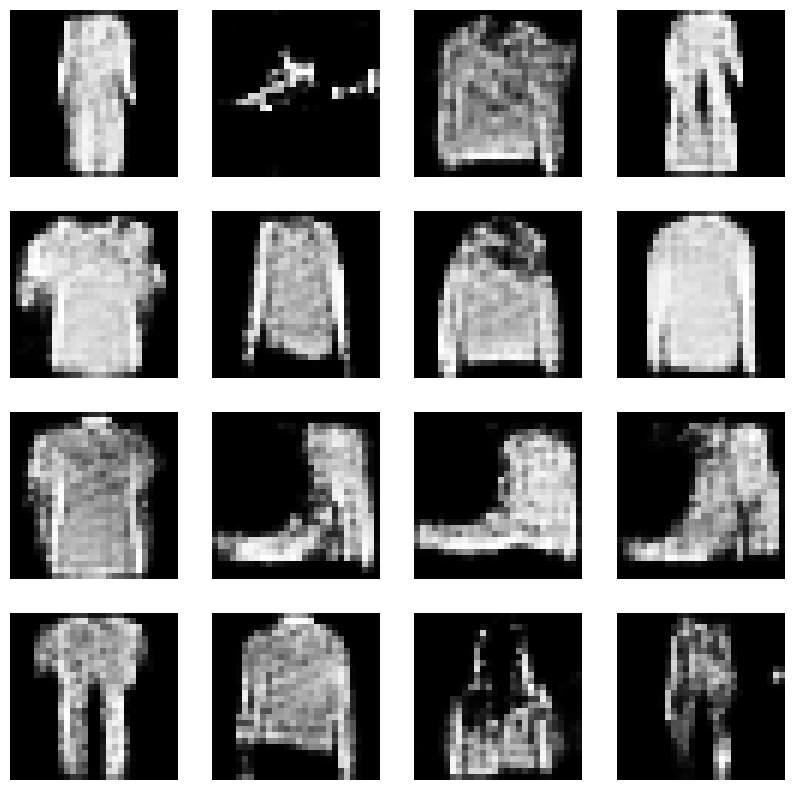

Epoch:  76


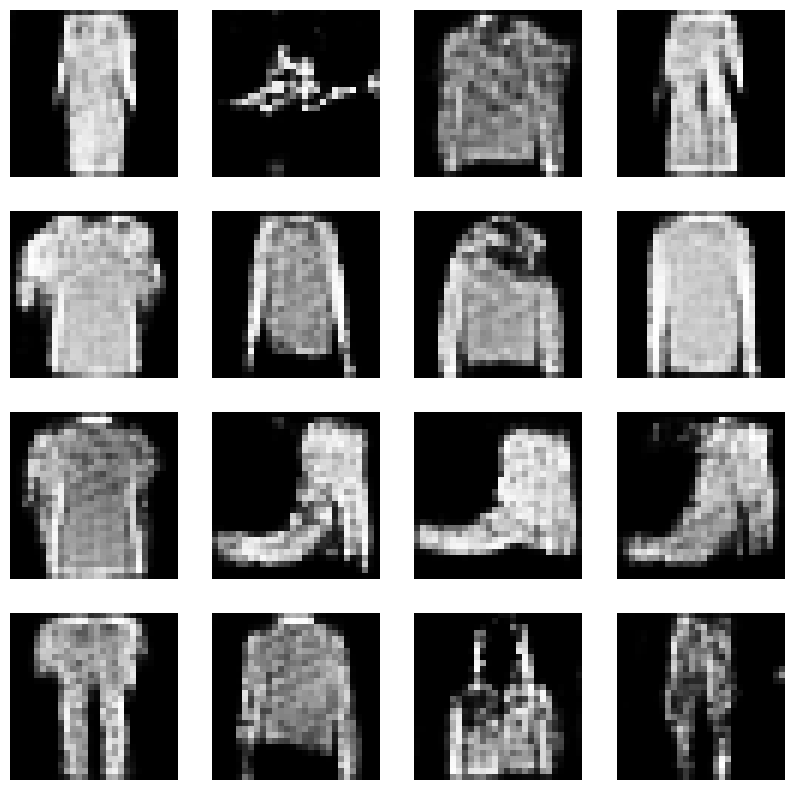

Epoch:  77


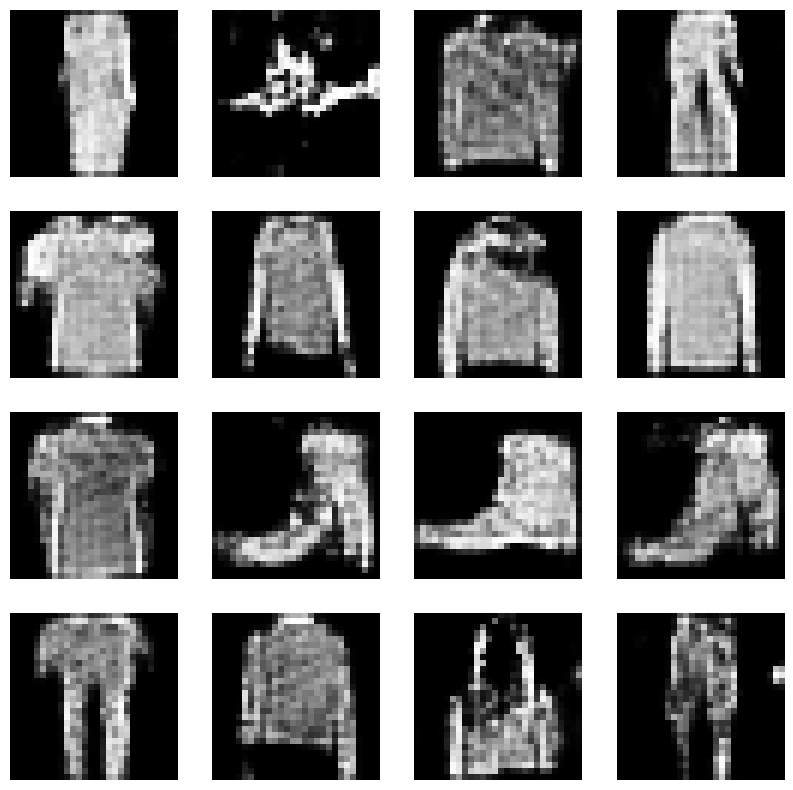

Epoch:  78


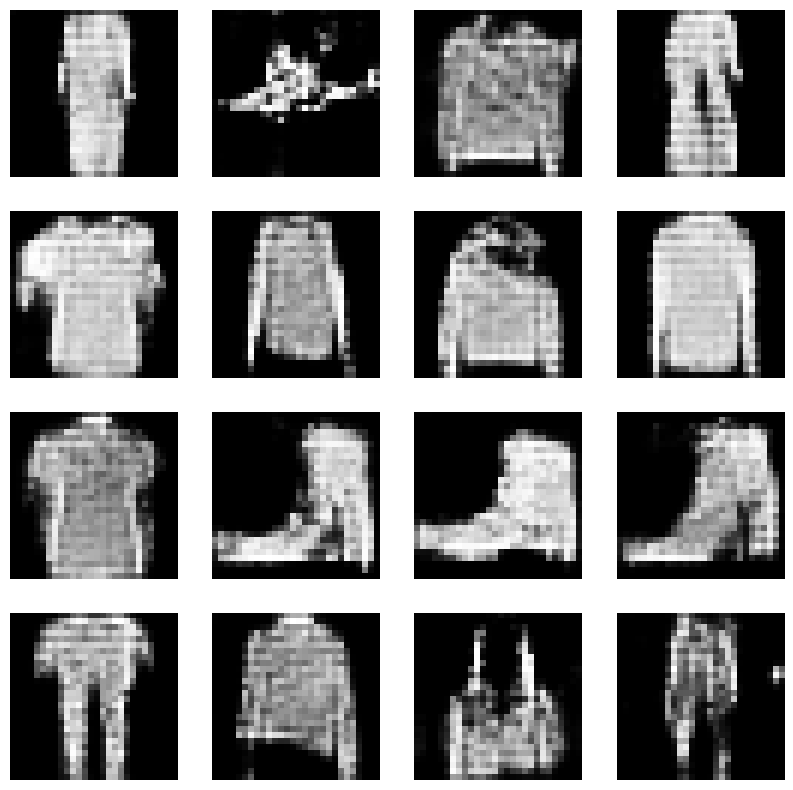

Epoch:  79


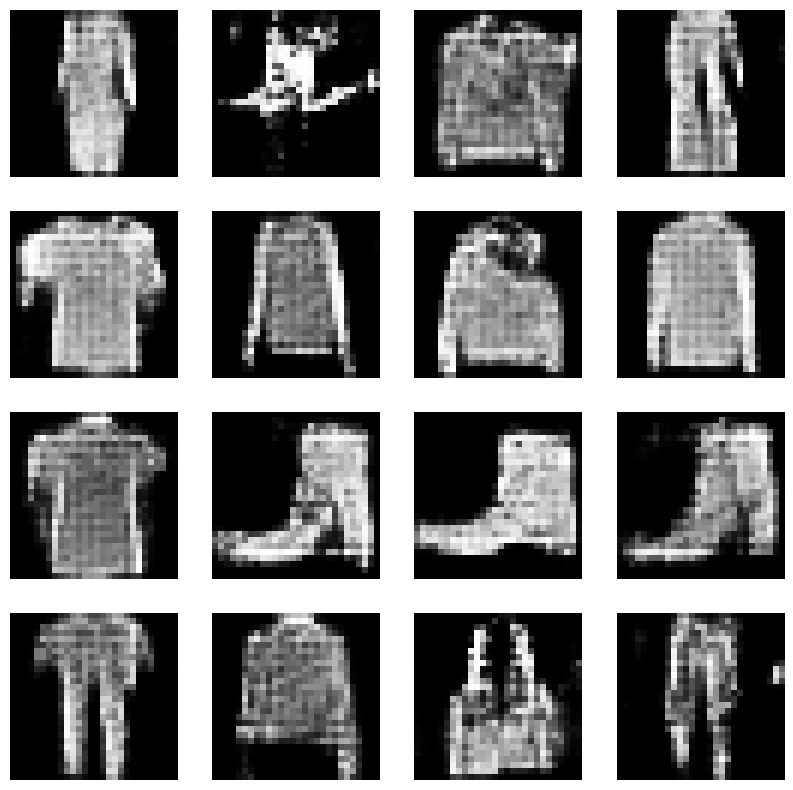

Epoch:  80


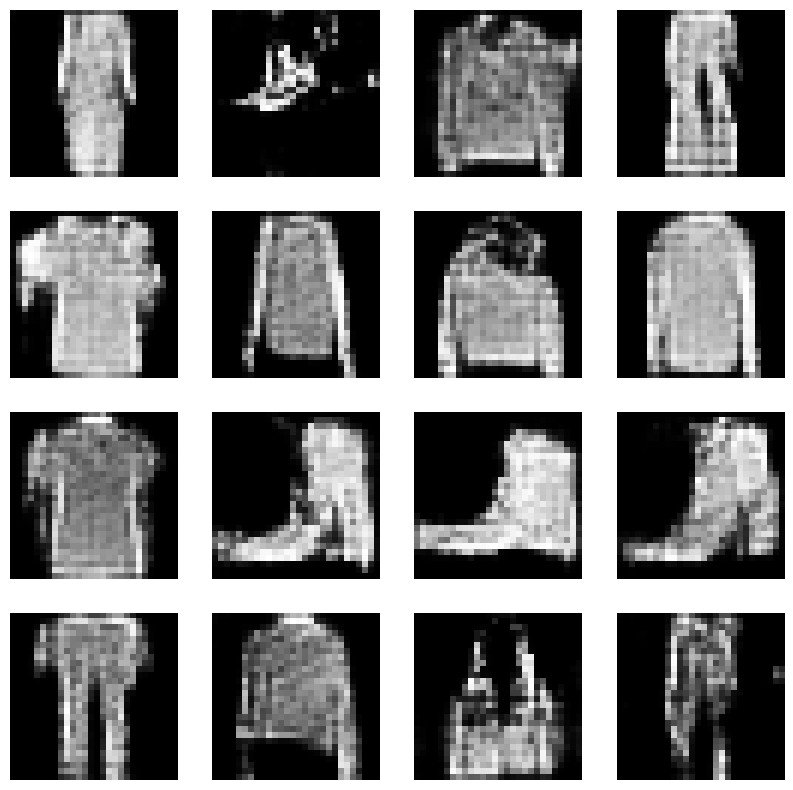

Epoch:  81


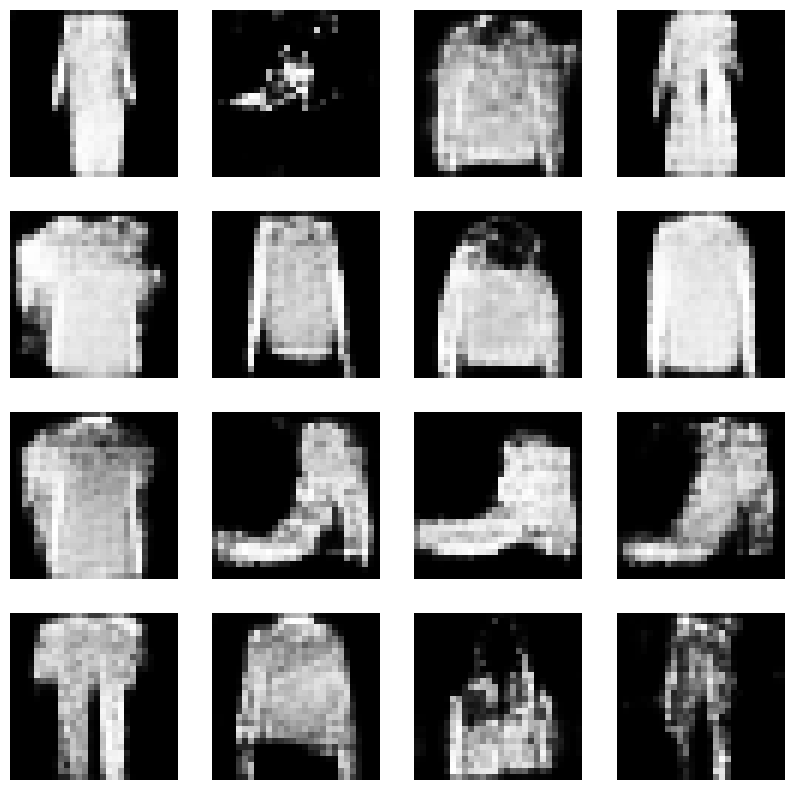

Epoch:  82


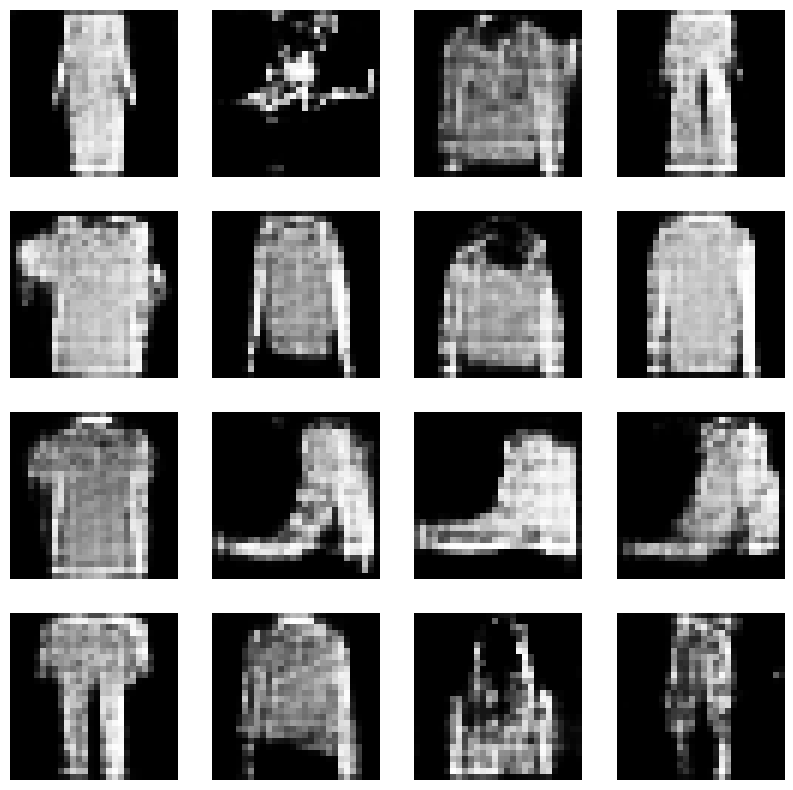

Epoch:  83


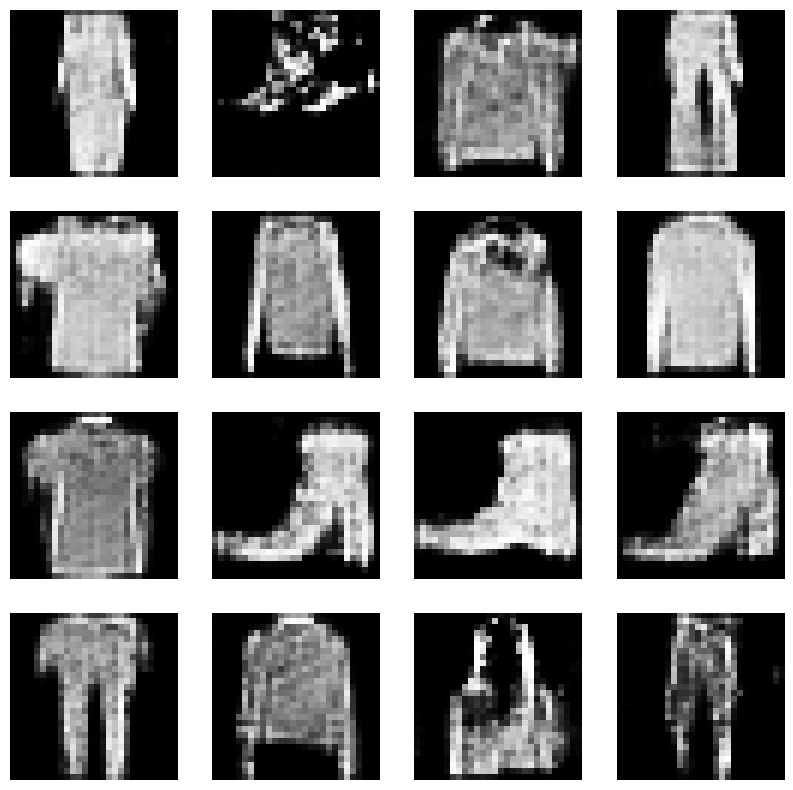

Epoch:  84


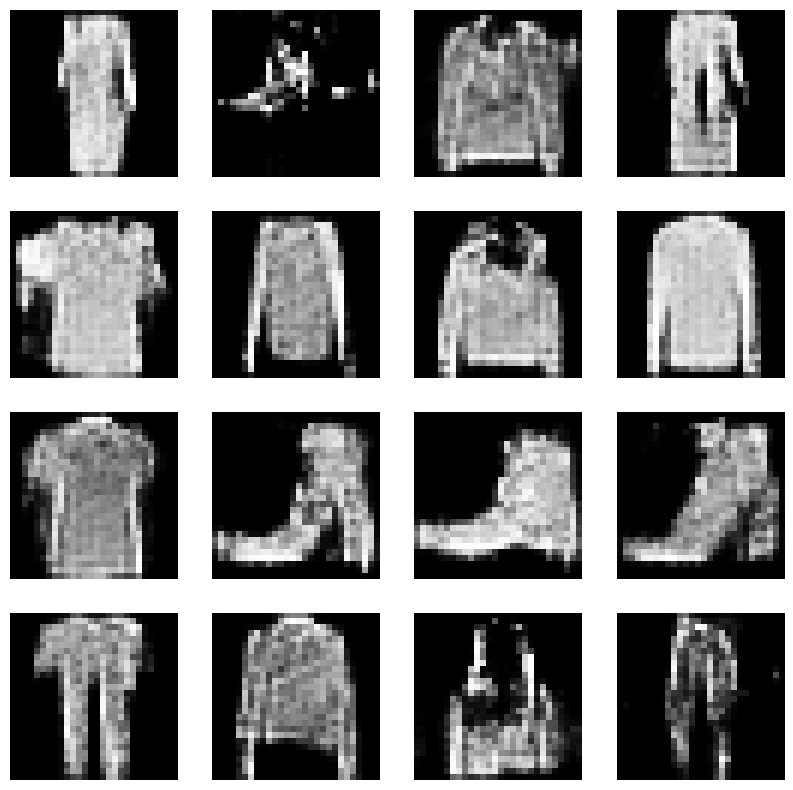

Epoch:  85


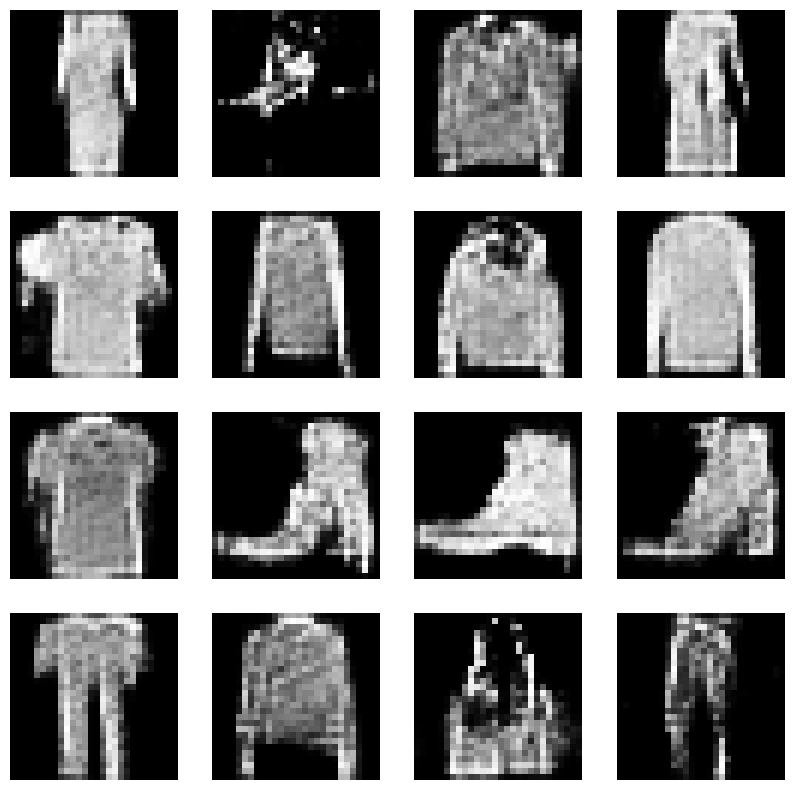

Epoch:  86


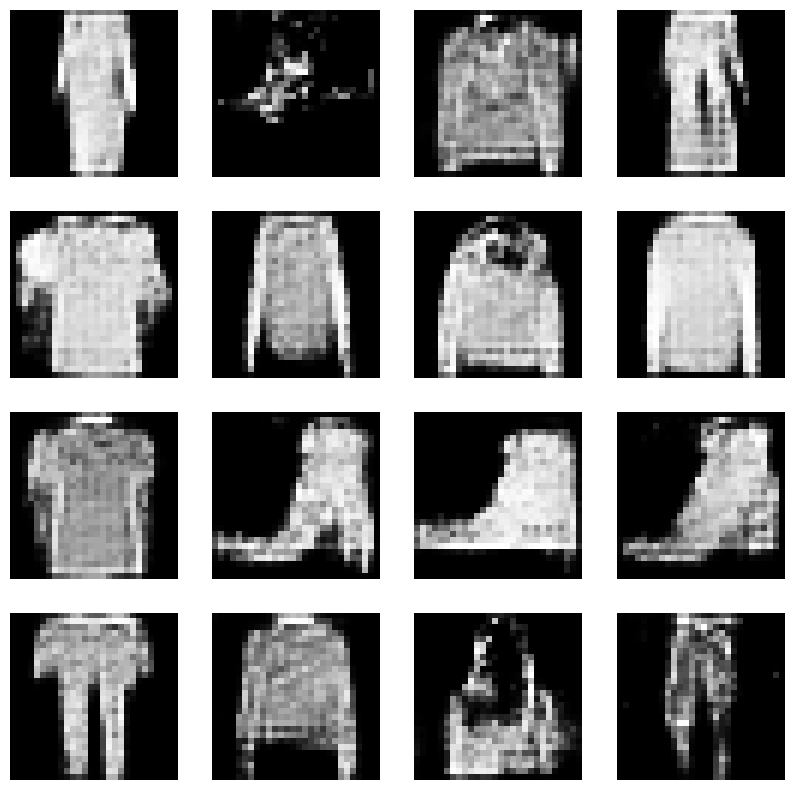

Epoch:  87


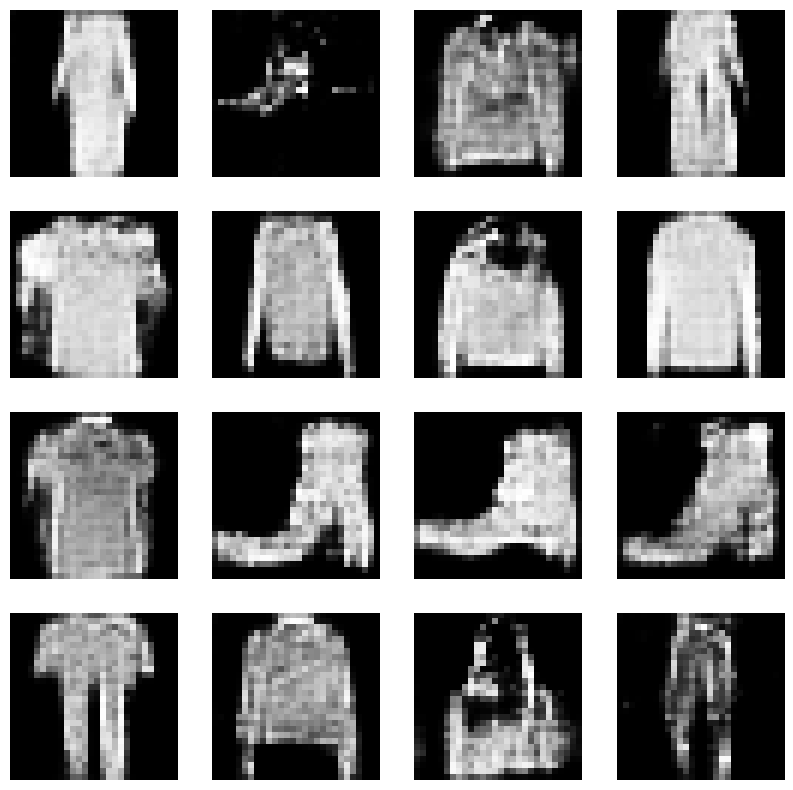

Epoch:  88


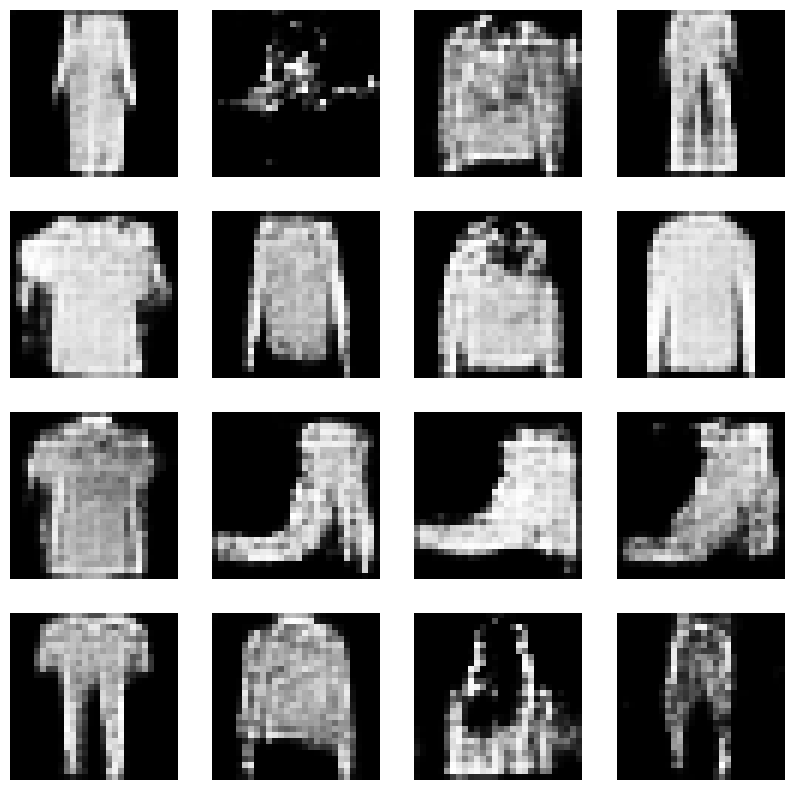

Epoch:  89


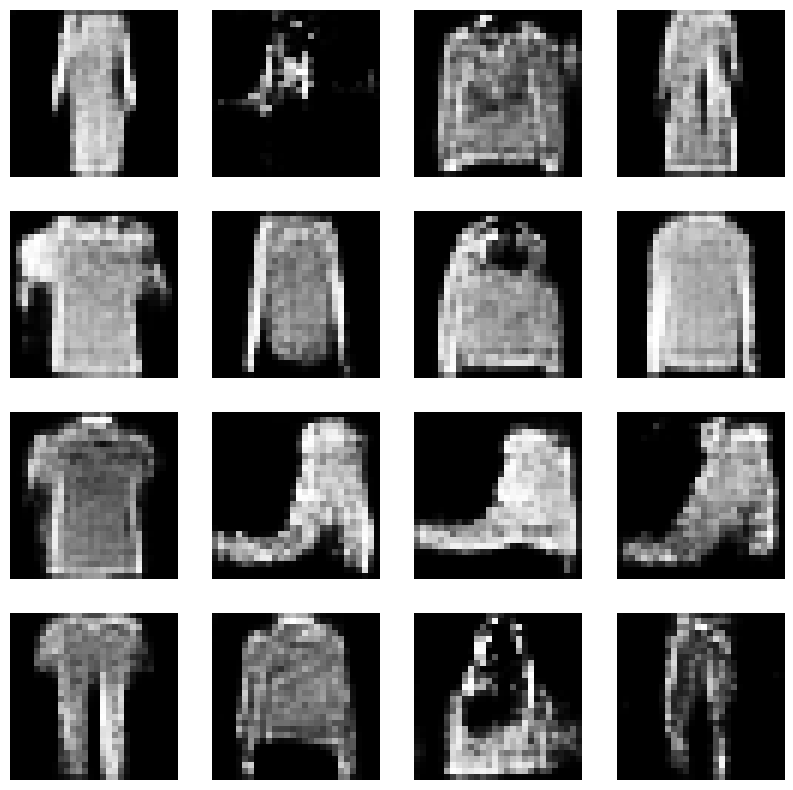

Epoch:  90


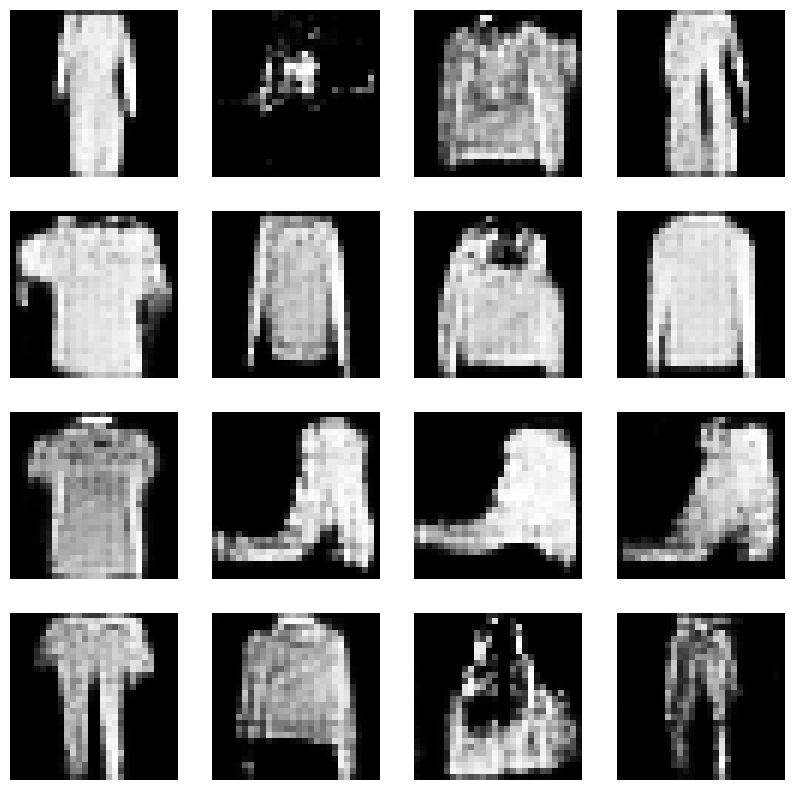

Epoch:  91


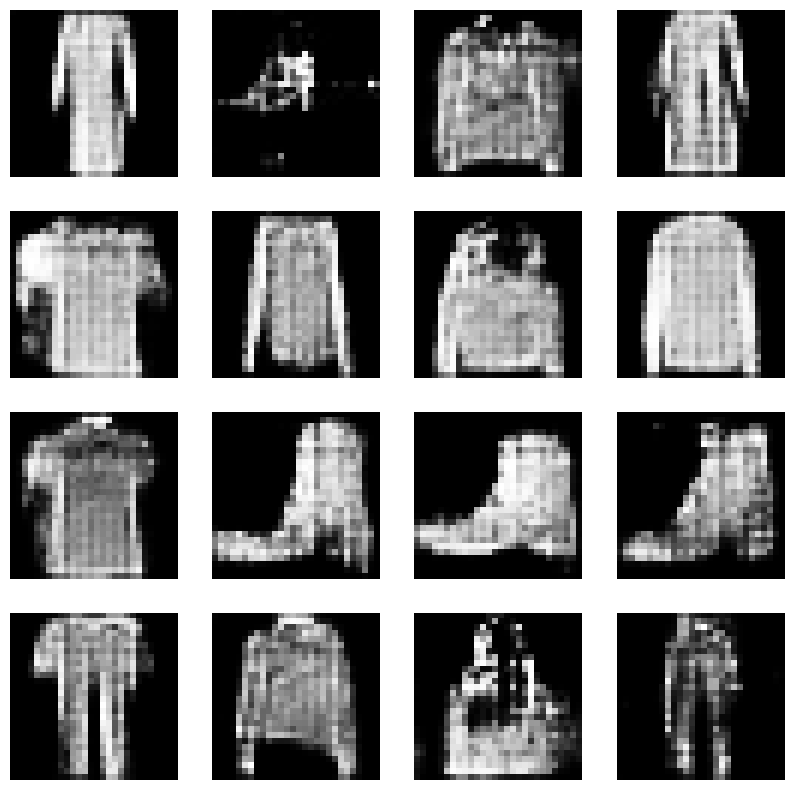

Epoch:  92


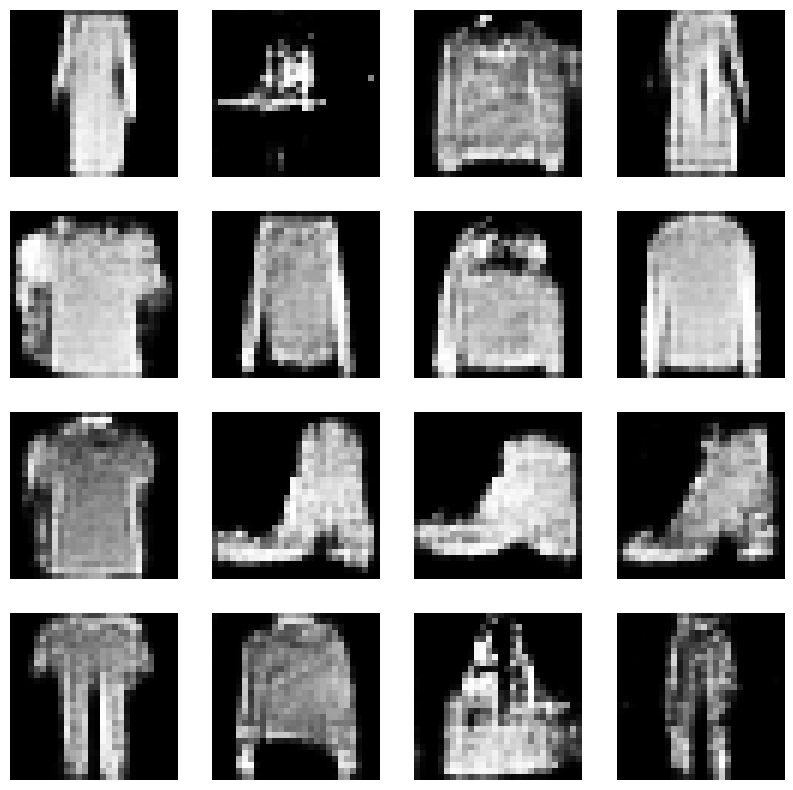

Epoch:  93


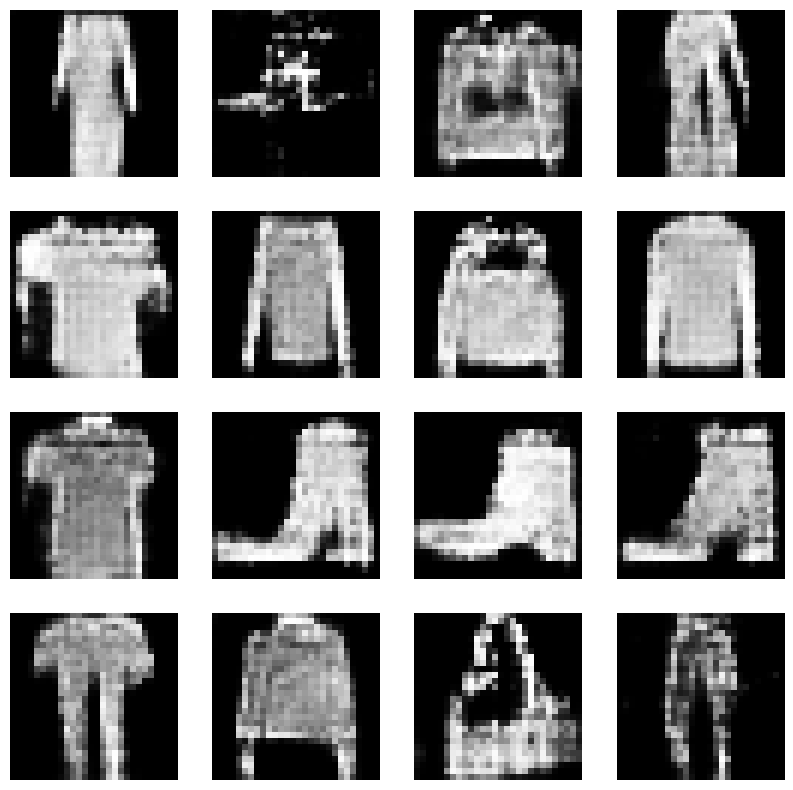

Epoch:  94


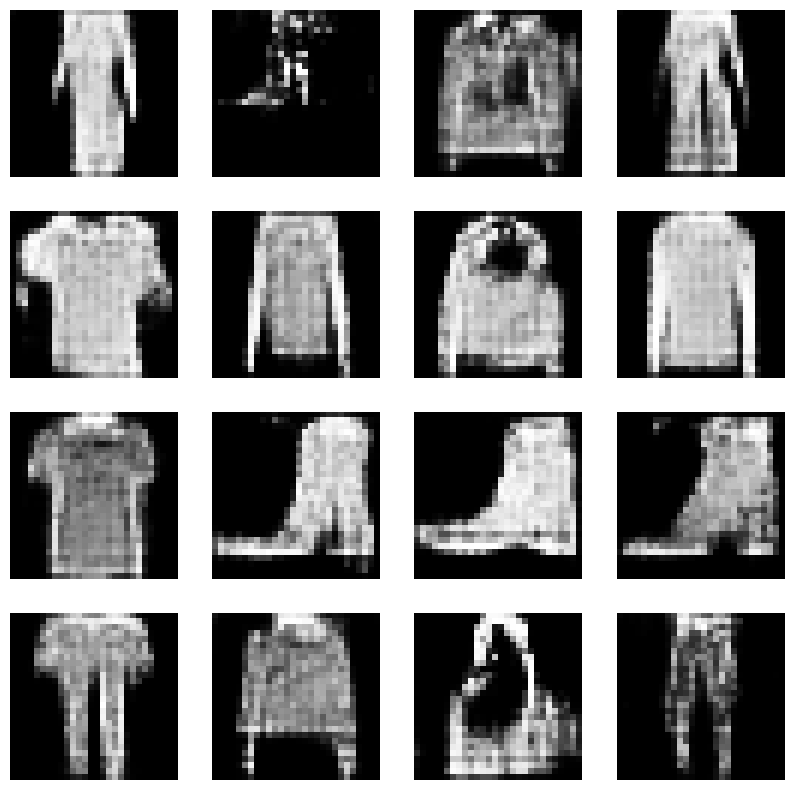

Epoch:  95


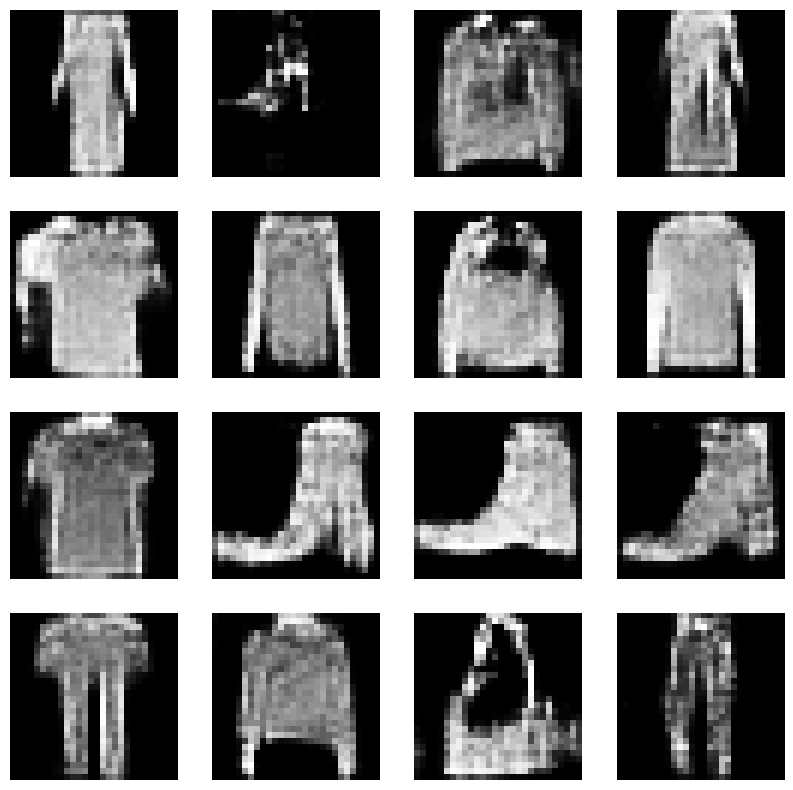

Epoch:  96


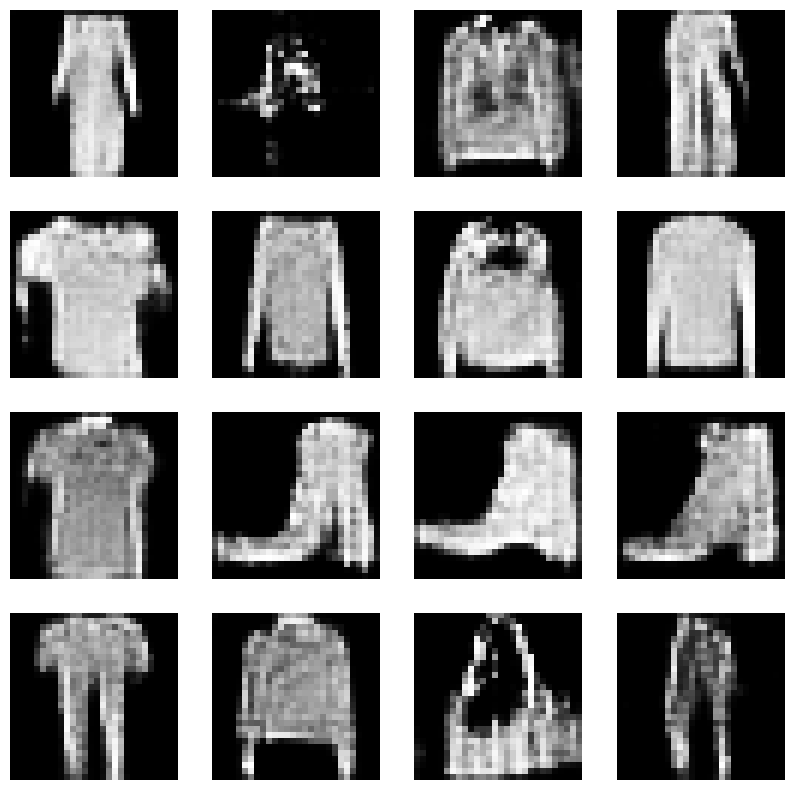

Epoch:  97


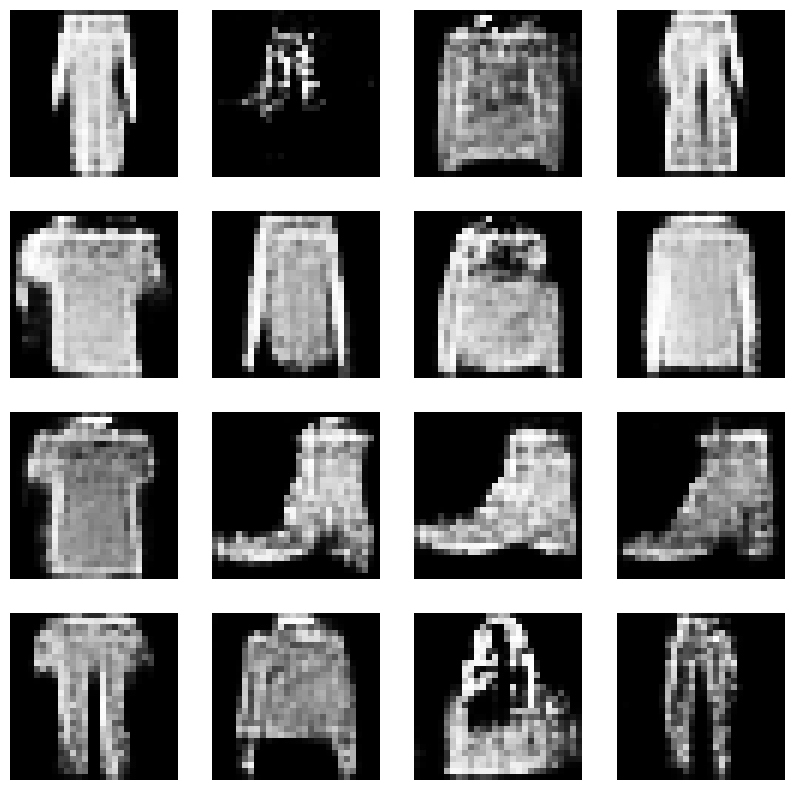

Epoch:  98


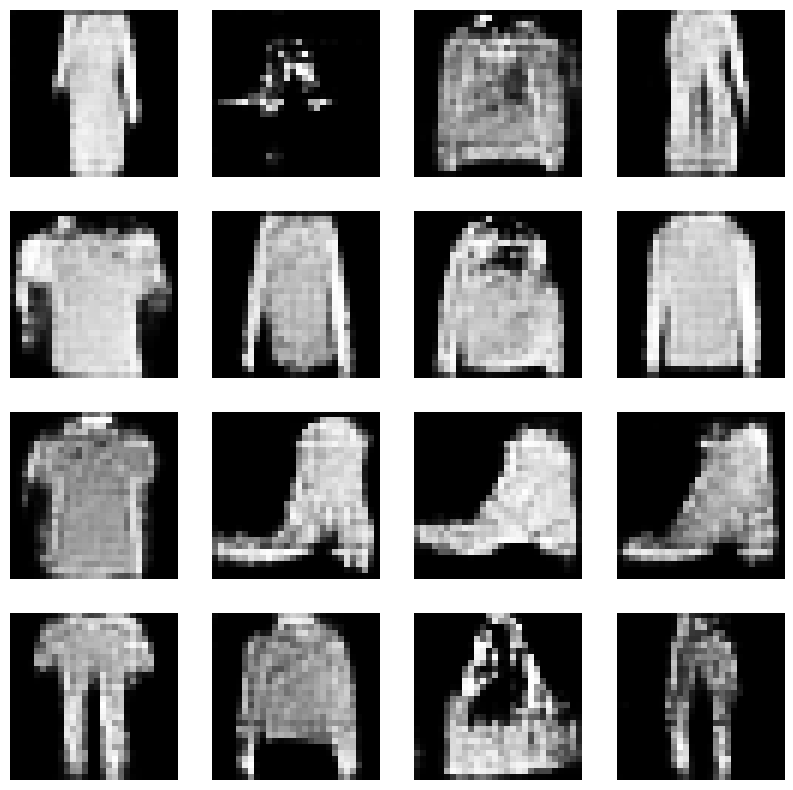

Epoch:  99


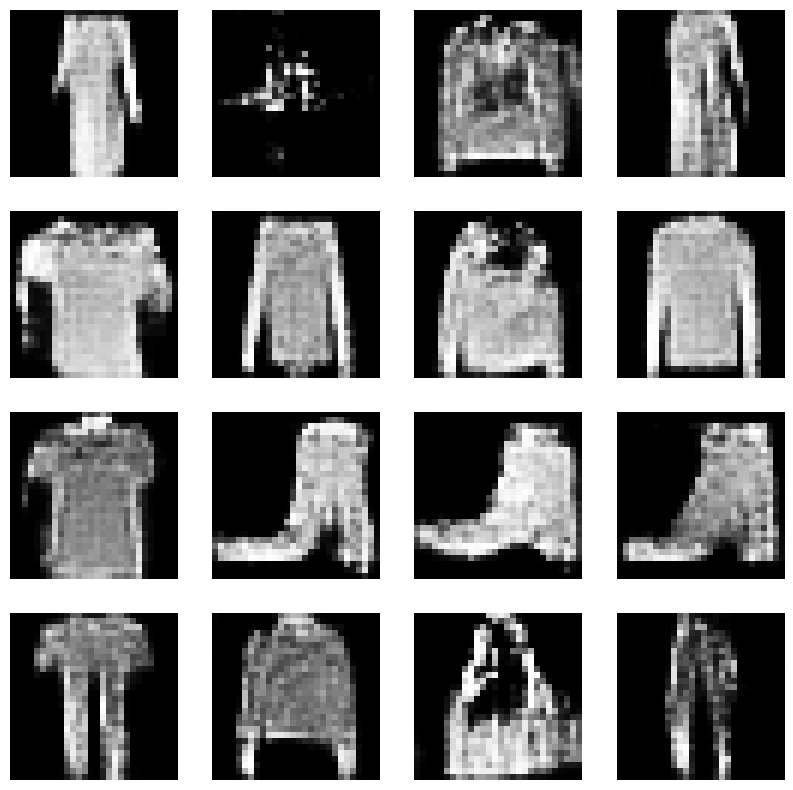

Epoch:  100


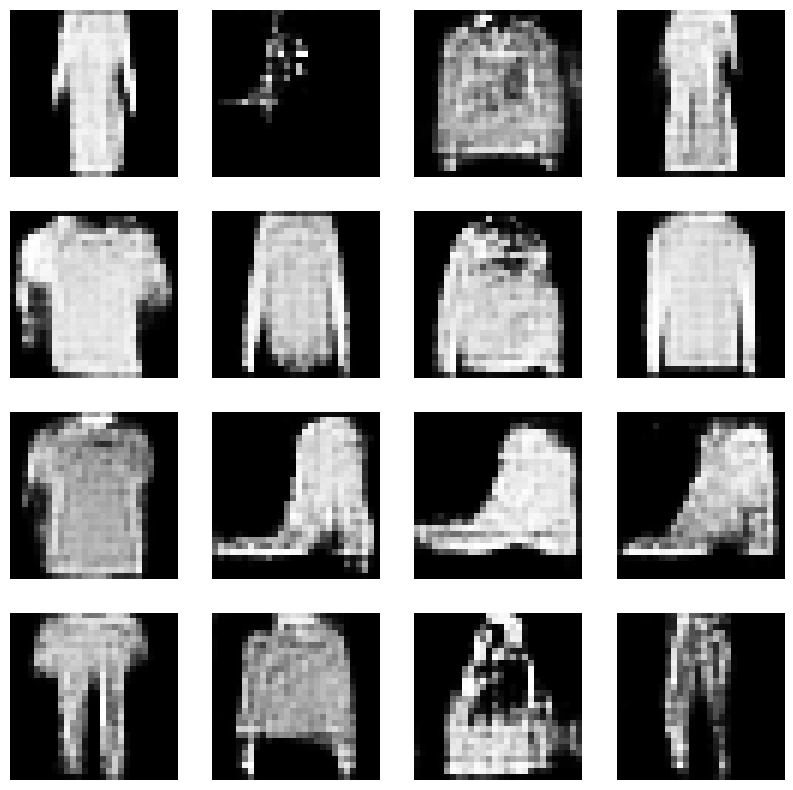

In [43]:
train_gan(X_train, epochs, test_images)